Problem 2 for the Data Set: SoftDrink.csv

You are an analyst in the RST soft drink company and you are expected to forecast the sales of the production of the soft drink for the upcoming 12 months from where the data ends. The data for the production of soft drinks has been given to you from January 1980 to July 1995.

1. Read the data as an appropriate Time Series data and plot the data.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving SoftDrink.csv to SoftDrink.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import sklearn
import statsmodels

In [3]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Seaborn version:',sns.__version__)
print('Matplotlib version:',matplotlib.__version__)
print('Sklearn version:',sklearn.__version__)
print('Statsmodels version:',statsmodels.__version__)

Numpy version: 1.21.5
Pandas version: 1.3.5
Seaborn version: 0.11.2
Matplotlib version: 3.2.2
Sklearn version: 1.0.2
Statsmodels version: 0.13.2


In [4]:
!pip install -U statsmodels


In [5]:
!pip install -U sklearn


Method 1

In [6]:
df2 = pd.read_csv('SoftDrink.csv')

In [7]:
df2.head()

YearMonth  SoftDrinkProduction
0   1980-01                 1954
1   1980-02                 2302
2   1980-03                 3054
3   1980-04                 2414
4   1980-05                 2226

In [8]:
df2 = pd.read_csv('SoftDrink.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [9]:
df2.head()

SoftDrinkProduction
YearMonth                      
1980-01-01                 1954
1980-02-01                 2302
1980-03-01                 3054
1980-04-01                 2414
1980-05-01                 2226

In [10]:
df2.tail()

SoftDrinkProduction
YearMonth                      
1995-03-01                 4067
1995-04-01                 4022
1995-05-01                 3937
1995-06-01                 4365
1995-07-01                 4290

In [11]:
print("The no. of entries: ",df2.shape[0])

The no. of entries:  187


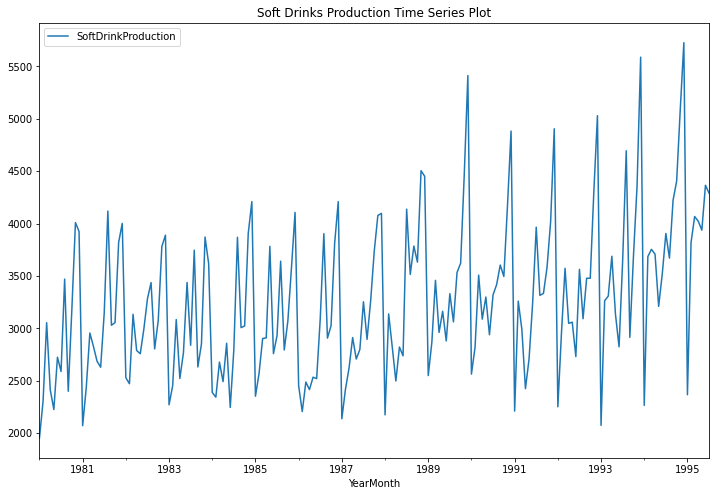

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df2.plot()
plt.title("Soft Drinks Production Time Series Plot")
plt.show()

Method 2

In [13]:
df_2 = pd.read_csv("SoftDrink.csv")

In [14]:
df_2.head()

YearMonth  SoftDrinkProduction
0   1980-01                 1954
1   1980-02                 2302
2   1980-03                 3054
3   1980-04                 2414
4   1980-05                 2226

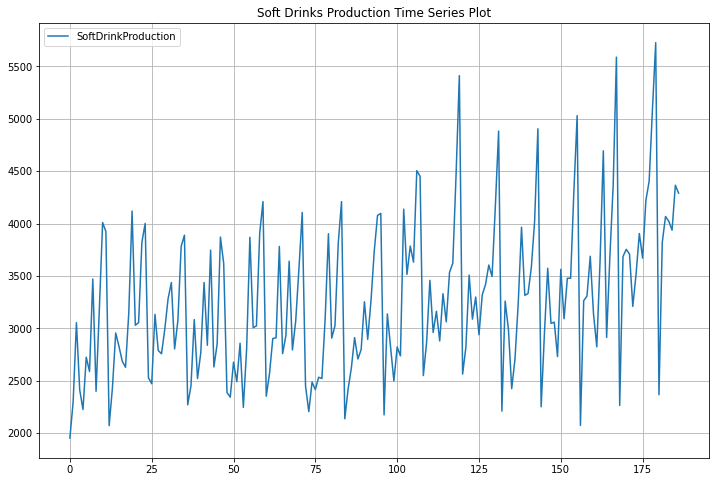

In [15]:
df_2.plot();
plt.title("Soft Drinks Production Time Series Plot")
plt.grid()

In [16]:
date2 = pd.date_range(start='1/1/1980', end='7/31/1995', freq='M')

In [17]:
date2

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [18]:
df_2['Time_Stamp'] = pd.DataFrame(date2,columns=['Month'])
df_2.head()

YearMonth  SoftDrinkProduction Time_Stamp
0   1980-01                 1954 1980-01-31
1   1980-02                 2302 1980-02-29
2   1980-03                 3054 1980-03-31
3   1980-04                 2414 1980-04-30
4   1980-05                 2226 1980-05-31

In [19]:
df = df_2.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

SoftDrinkProduction
Time_Stamp                     
1980-01-31                 1954
1980-02-29                 2302
1980-03-31                 3054
1980-04-30                 2414
1980-05-31                 2226

Text(0.5, 0, 'YearMonth')

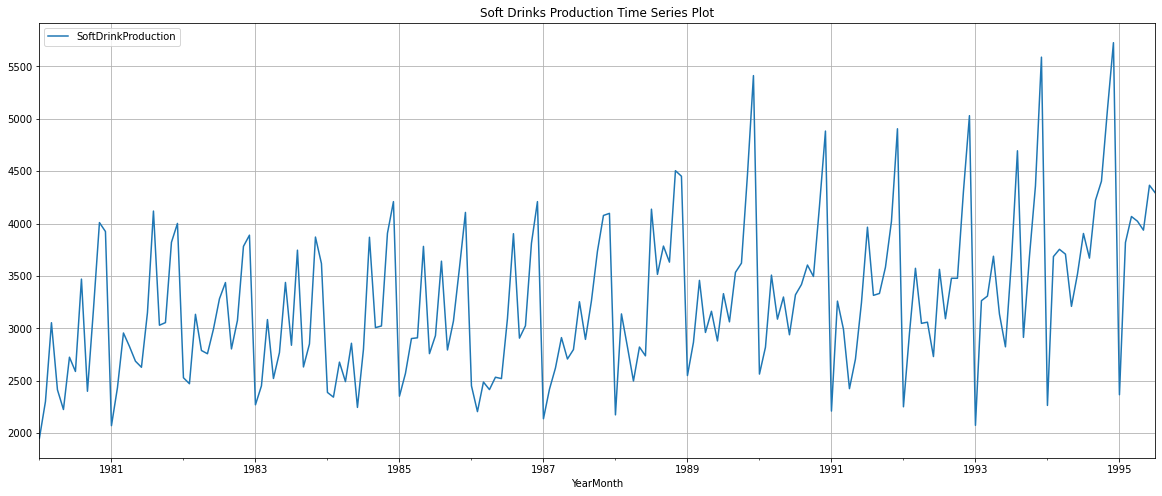

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8
df.plot(grid=True);
plt.title("Soft Drinks Production Time Series Plot")
plt.xlabel('YearMonth')

2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SoftDrinkProduction  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [22]:
df2.describe()

SoftDrinkProduction
count           187.000000
mean           3262.609626
std             728.357367
min            1954.000000
25%            2748.000000
50%            3134.000000
75%            3741.000000
max            5725.000000

In [23]:
null = df2.isnull().sum()
print('Number of null values in the dataset = ', null)

Number of null values in the dataset =  SoftDrinkProduction    0
dtype: int64


In [24]:
dups = df2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 4


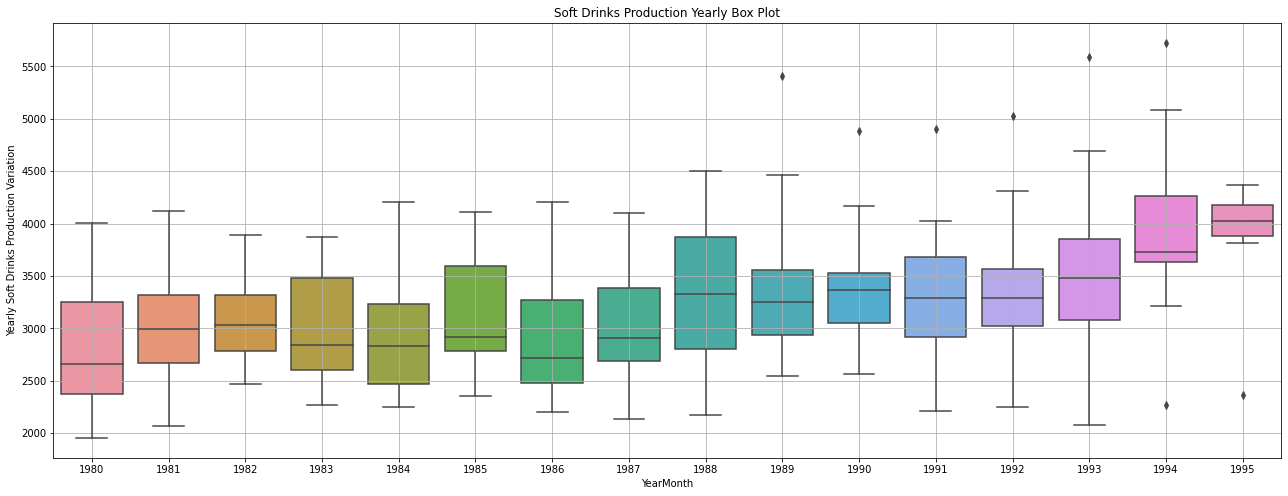

In [25]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df2.index.year,y = df2.values[:,0],ax=ax)
plt.title("Soft Drinks Production Yearly Box Plot")
plt.ylabel('Yearly Soft Drinks Production Variation');
plt.grid();

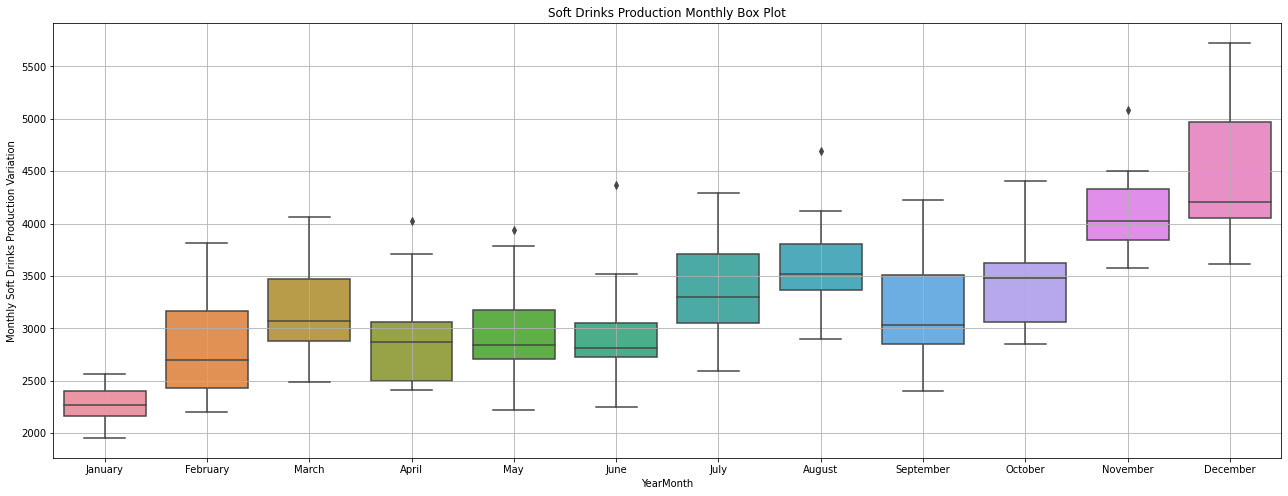

In [26]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df2.index.month_name(),y = df2.values[:,0],ax=ax)
plt.title("Soft Drinks Production Monthly Box Plot")
plt.ylabel('Monthly Soft Drinks Production Variation');
plt.grid();

In [27]:
monthly_sales_across_years = pd.pivot_table(df2, values = 'SoftDrinkProduction', columns = df2.index.month_name(), index = df2.index.year)
monthly_sales_across_years

YearMonth   April  August  December  February  January    July    June  \
YearMonth                                                                
1980       2414.0  3470.0    3924.0    2302.0   1954.0  2589.0  2725.0   
1981       2828.0  4119.0    4001.0    2434.0   2072.0  3150.0  2629.0   
1982       2789.0  3437.0    3889.0    2472.0   2529.0  3282.0  2993.0   
1983       2522.0  3746.0    3618.0    2452.0   2271.0  2839.0  3438.0   
1984       2492.0  3869.0    4209.0    2344.0   2389.0  2800.0  2246.0   
1985       2910.0  3641.0    4106.0    2570.0   2353.0  2931.0  2759.0   
1986       2416.0  3903.0    4209.0    2206.0   2452.0  3093.0  2521.0   
1987       2912.0  2895.0    4097.0    2419.0   2138.0  3254.0  2798.0   
1988       2498.0  3515.0    4451.0    3138.0   2175.0  4137.0  2738.0   
1989       2961.0  3062.0    5411.0    2867.0   2550.0  3331.0  2880.0   
1990       3088.0  3418.0    4882.0    2820.0   2564.0  3320.0  2939.0   
1991       2425.0  3315.0    4904.0    3260.0   2211.0  3965.0  3244.0   
1992       3048.0  3092.0    5029.0    2952.0   2252.0  3563.0  2731.0   
1993       3688.0  4694.0    5587.0    3264.0   2075.0  3644.0  2824.0   
1994       3708.0  3670.0    5725.0    3685.0   2265.0  3905.0  3517.0   
1995       4022.0     NaN       NaN    3819.0   2367.0  4290.0  4365.0   

YearMonth   March     May  November  October  September  
YearMonth                                                
1980       3054.0  2226.0    4009.0   3180.0     2400.0  
1981       2956.0  2687.0    3821.0   3055.0     3030.0  
1982       3134.0  2758.0    3782.0   3076.0     2804.0  
1983       3084.0  2769.0    3871.0   2851.0     2632.0  
1984       2678.0  2858.0    3907.0   3023.0     3007.0  
1985       2903.0  3782.0    3576.0   3070.0     2794.0  
1986       2488.0  2534.0    3812.0   3025.0     2907.0  
1987       2622.0  2708.0    4077.0   3736.0     3263.0  
1988       2823.0  2822.0    4504.0   3632.0     3785.0  
1989       3458.0  3163.0    4464.0   3622.0     3534.0  
1990       3508.0  3299.0    4163.0   3495.0     3604.0  
1991       2992.0  2707.0    4021.0   3583.0     3333.0  
1992       3573.0  3059.0    4308.0   3478.0     3478.0  
1993       3308.0  3136.0    4358.0   3686.0     2914.0  
1994       3754.0  3210.0    5086.0   4404.0     4221.0  
1995       4067.0  3937.0       NaN      NaN        NaN

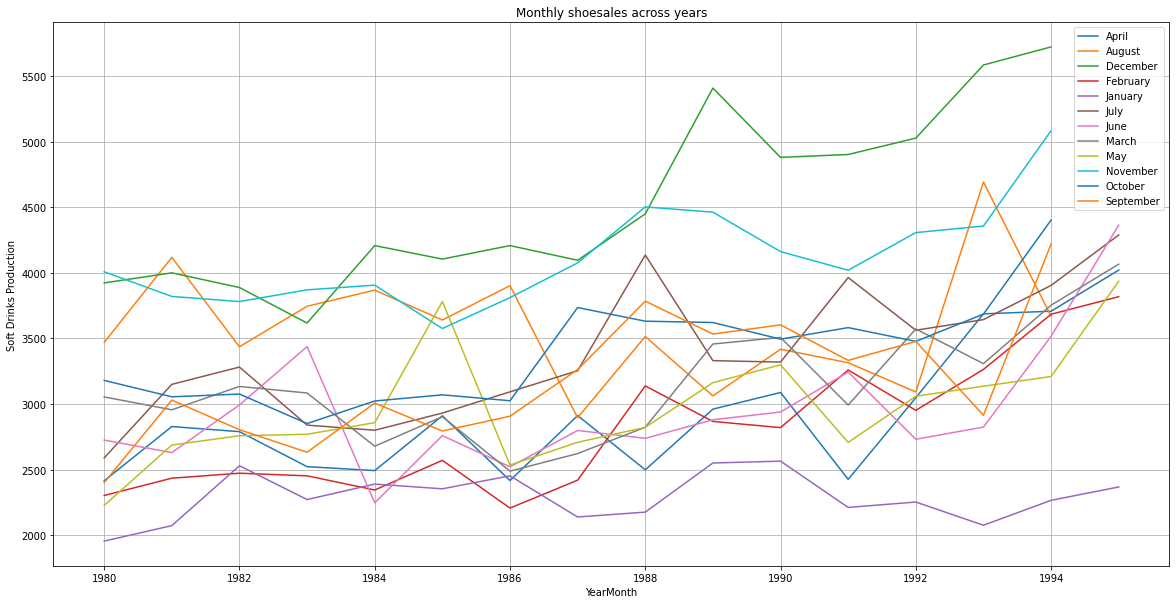

In [28]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.title("Monthly shoesales across years")
plt.ylabel('Soft Drinks Production');
plt.legend(loc='best');

Yearly Plot

In [29]:
df2_yearly_sum = df2.resample('A').sum()
df2_yearly_sum.head()

SoftDrinkProduction
YearMonth                      
1980-12-31                34247
1981-12-31                36782
1982-12-31                36945
1983-12-31                36093
1984-12-31                35822

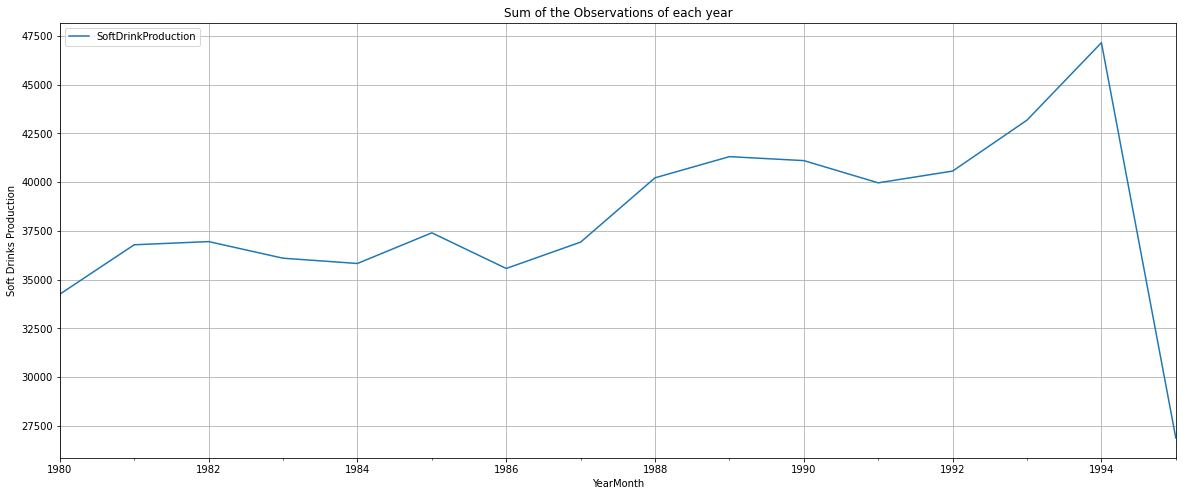

In [30]:
df2_yearly_sum.plot();
plt.grid()
plt.title("Sum of the Observations of each year")
plt.ylabel('Soft Drinks Production');

In [31]:
df2_yearly_mean = df2.resample('Y').mean()
df2_yearly_mean.head()

SoftDrinkProduction
YearMonth                      
1980-12-31          2853.916667
1981-12-31          3065.166667
1982-12-31          3078.750000
1983-12-31          3007.750000
1984-12-31          2985.166667

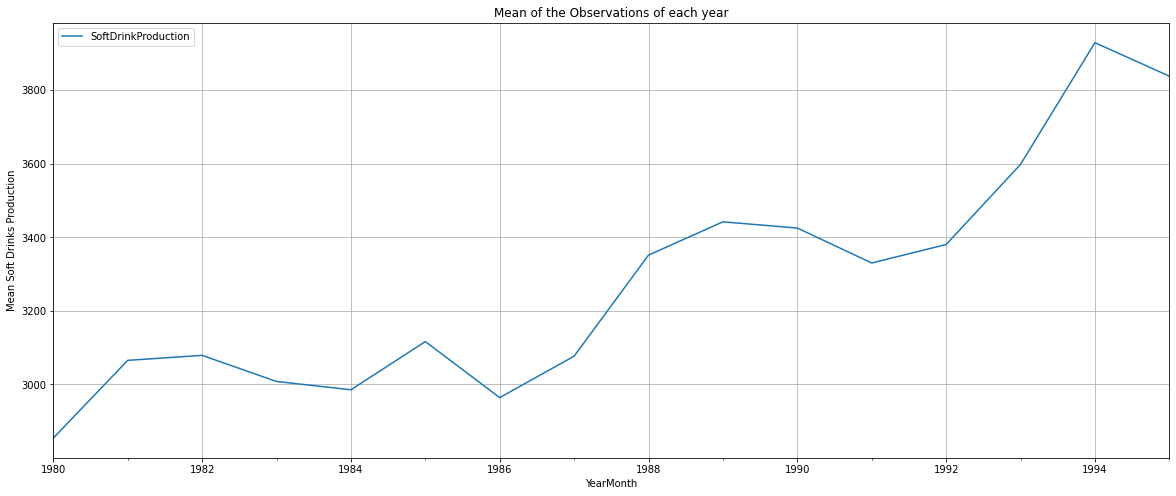

In [32]:
df2_yearly_mean.plot();
plt.grid()
plt.title("Mean of the Observations of each year")
plt.ylabel('Mean Soft Drinks Production');

Quarterly Plot

In [33]:
df2_quarterly_sum = df2.resample('Q').sum()
df2_quarterly_sum.head()

SoftDrinkProduction
YearMonth                      
1980-03-31                 7310
1980-06-30                 7365
1980-09-30                 8459
1980-12-31                11113
1981-03-31                 7462

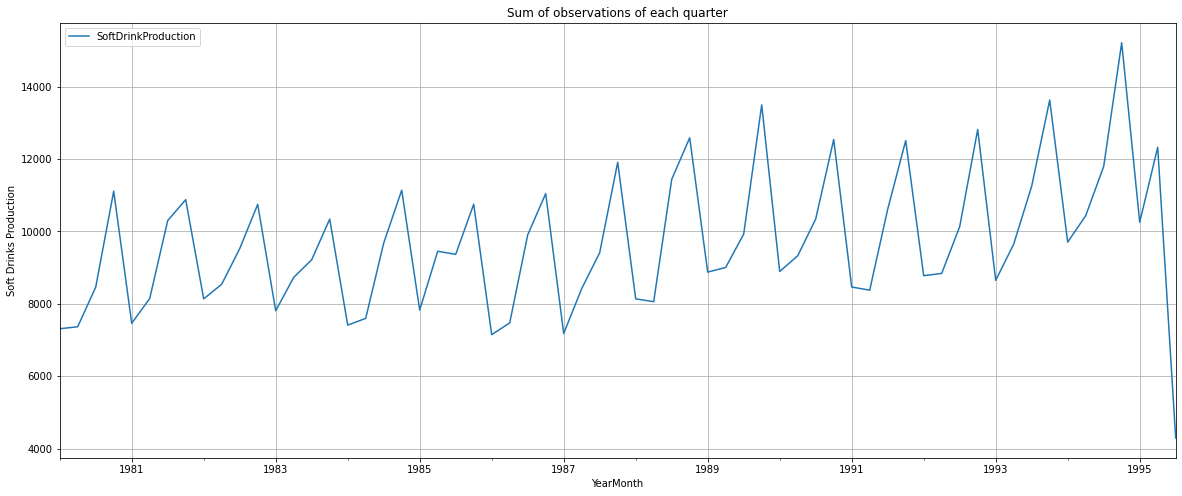

In [34]:
df2_quarterly_sum.plot();
plt.title("Sum of observations of each quarter")
plt.ylabel('Soft Drinks Production');
plt.grid()

In [35]:
df2_quarterly_mean = df2.resample('Q').mean()
df2_quarterly_mean.head()

SoftDrinkProduction
YearMonth                      
1980-03-31          2436.666667
1980-06-30          2455.000000
1980-09-30          2819.666667
1980-12-31          3704.333333
1981-03-31          2487.333333

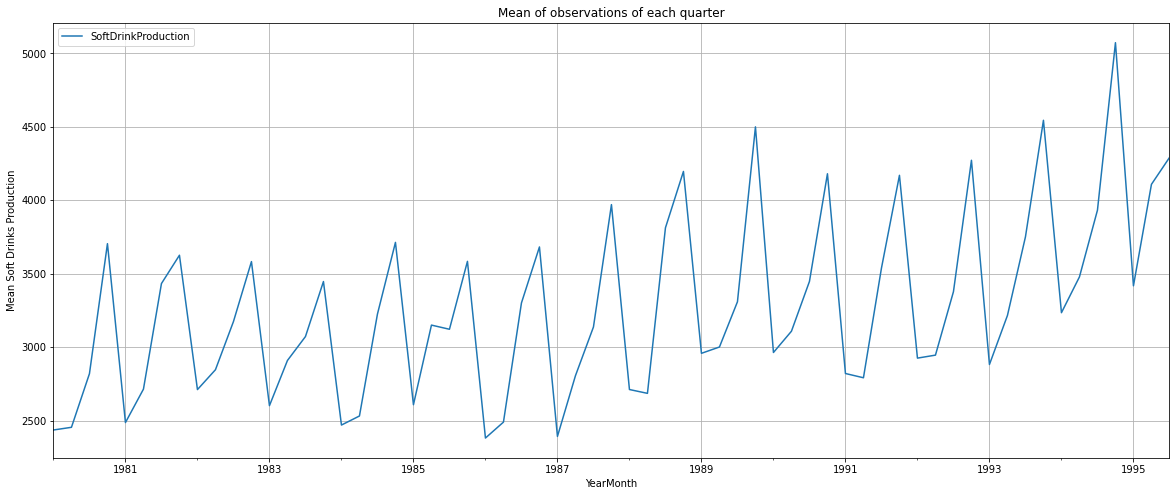

In [36]:
df2_quarterly_mean.plot();
plt.title("Mean of observations of each quarter")
plt.ylabel('Mean Soft Drinks Production');
plt.grid()

Daily Plot

In [37]:
df2_daily_sum = df2.resample('D').sum()
df2_daily_sum

SoftDrinkProduction
YearMonth                      
1980-01-01                 1954
1980-01-02                    0
1980-01-03                    0
1980-01-04                    0
1980-01-05                    0
...                         ...
1995-06-27                    0
1995-06-28                    0
1995-06-29                    0
1995-06-30                    0
1995-07-01                 4290

[5661 rows x 1 columns]

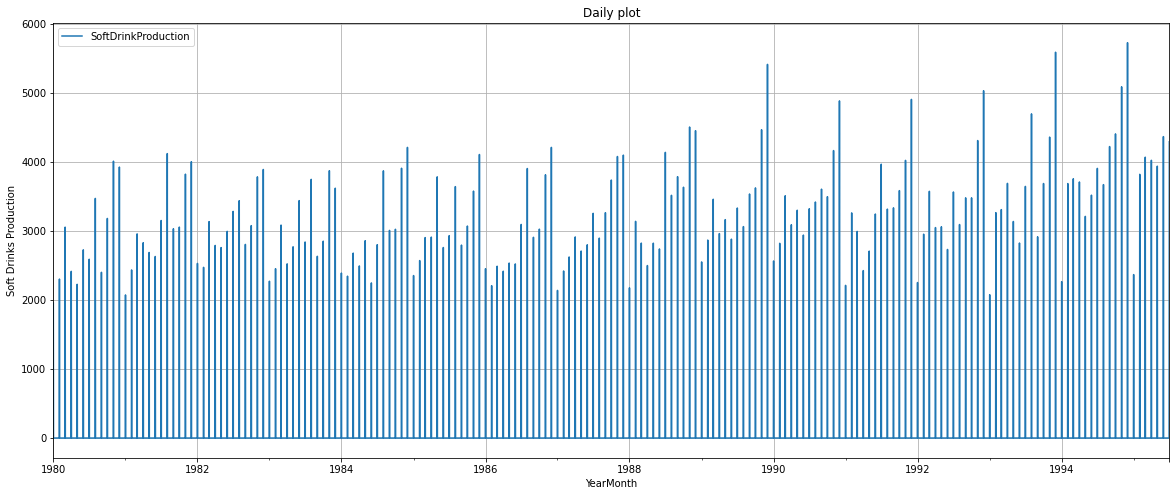

In [38]:
df2_daily_sum.plot()
plt.title("Daily plot")
plt.ylabel('Soft Drinks Production');
plt.grid();

Decade Plot

In [39]:
df2_decade_sum = df2.resample('10Y').sum()
df2_decade_sum

SoftDrinkProduction
YearMonth                      
1980-12-31                34247
1990-12-31               378143
2000-12-31               197718

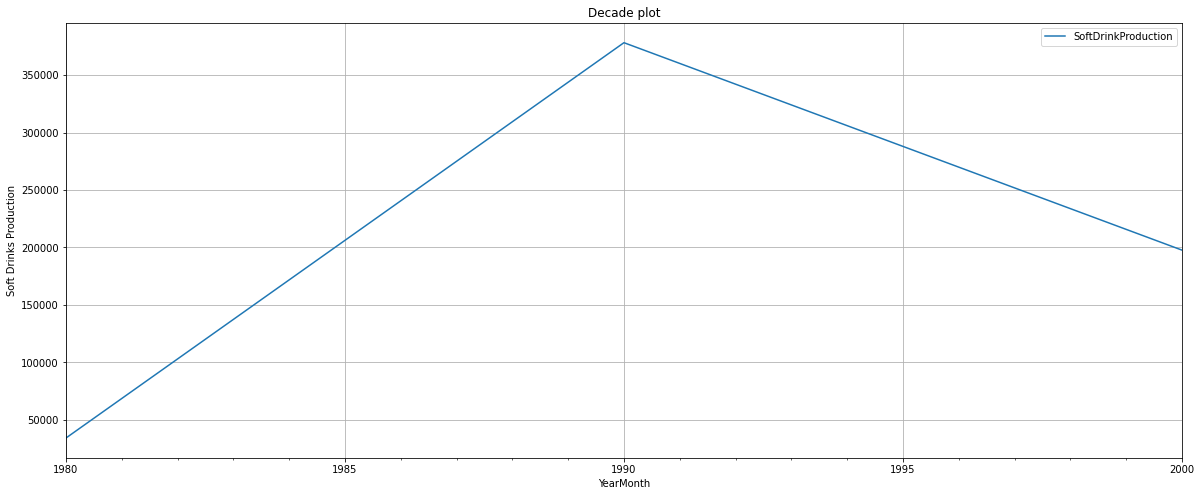

In [40]:
df2_decade_sum.plot();
plt.title("Decade plot")
plt.ylabel('Soft Drinks Production');
plt.grid()

Decompose the time series

In [41]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

Additive model

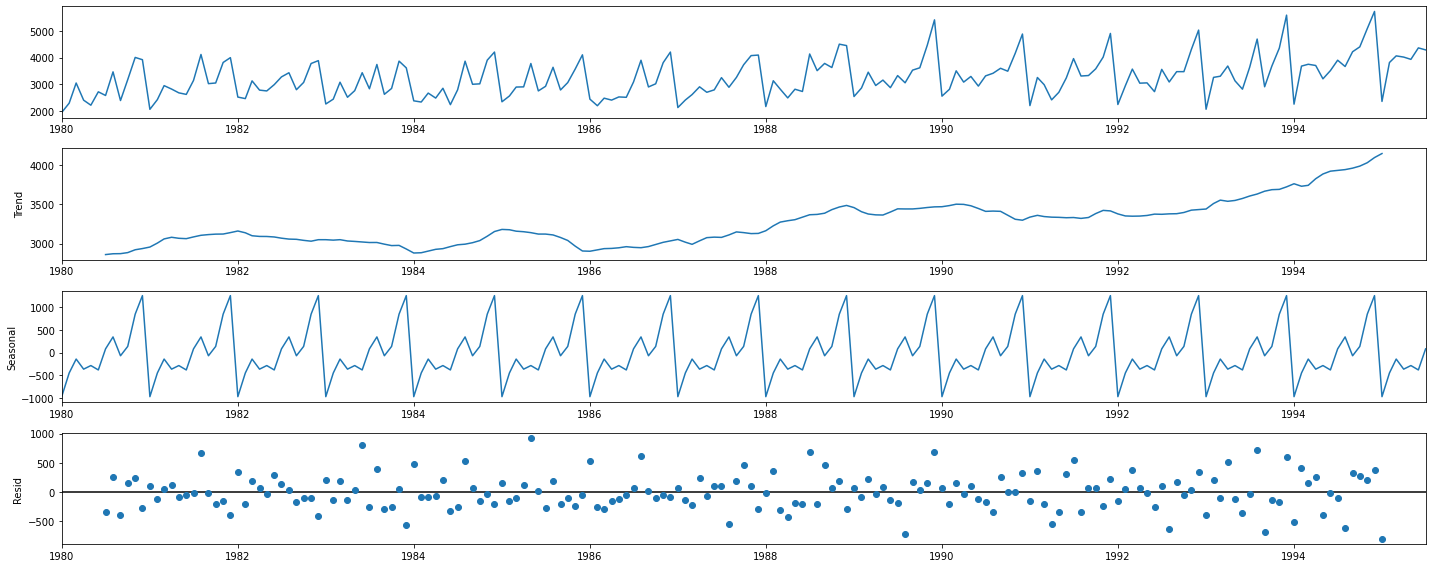

In [42]:
decomposition_add = seasonal_decompose(df2,model='additive')
decomposition_add.plot();

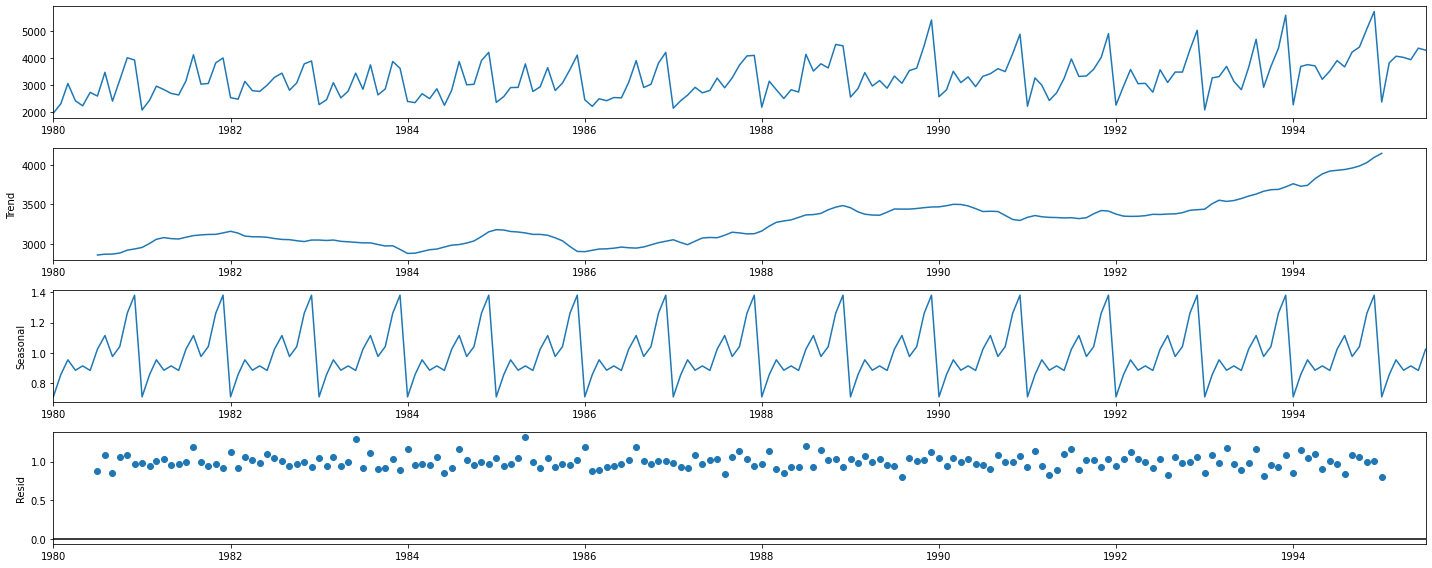

In [43]:
decomposition_mul = seasonal_decompose(df2,model='multiplicative')
decomposition_mul.plot();

In [44]:
trend = decomposition_mul.trend
seasonality = decomposition_mul.seasonal
residual = decomposition_mul.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2858.833333
1980-08-01    2869.250000
1980-09-01    2870.666667
1980-10-01    2883.833333
1980-11-01    2920.291667
1980-12-01    2935.500000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.709526
1980-02-01    0.856420
1980-03-01    0.953935
1980-04-01    0.885217
1980-05-01    0.913735
1980-06-01    0.883890
1980-07-01    1.023936
1980-08-01    1.114195
1980-09-01    0.975955
1980-10-01    1.040944
1980-11-01    1.261792
1980-12-01    1.380456
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.884444
1980-08-01    1.085425
1980-09-01    0.856641
1980-10-01    1.059326
1980-11-01    1.087983
1980-12-01    0.968332
Name: resi

In [45]:
deaseasonalized_trse = trend + residual
deaseasonalized_trse.head(12)

YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2859.717778
1980-08-01    2870.335425
1980-09-01    2871.523308
1980-10-01    2884.892659
1980-11-01    2921.379650
1980-12-01    2936.468332
dtype: float64

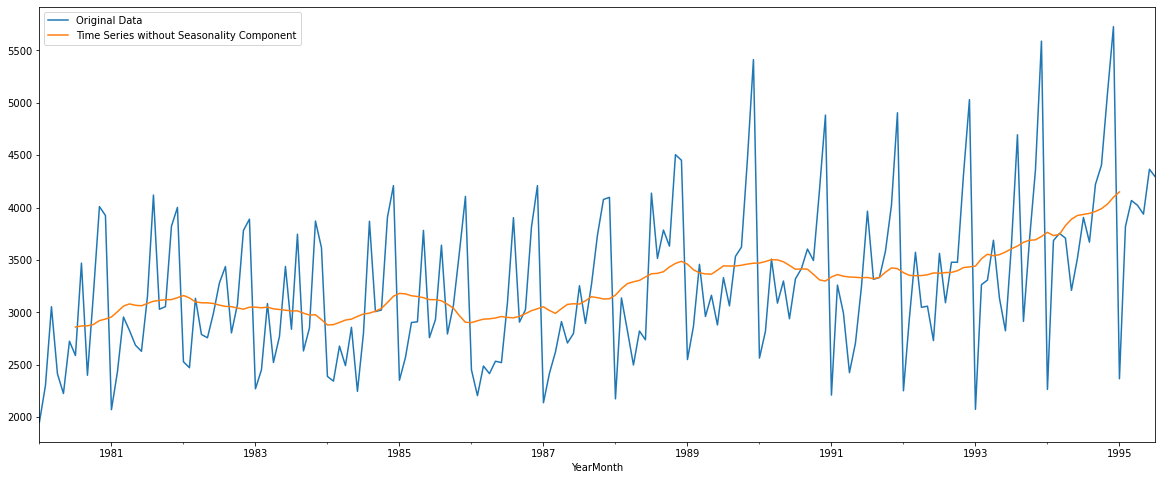

In [46]:
df2.plot()
deaseasonalized_trse.plot()
plt.legend(["Original Data", "Time Series without Seasonality Component"]);

3. Split the data into training and test. The test data should start in 1991.

In [47]:
train=df2[df2.index.year < 1991]
test=df2[df2.index.year >= 1991]

In [48]:
print('First few rows of Training Data')
display(train.head())
print('\n')
print('Last few rows of Training Data')
display(train.tail())
print('\n')
print('First few rows of Test Data')
display(test.head())
print('\n')
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


SoftDrinkProduction
YearMonth                      
1980-01-01                 1954
1980-02-01                 2302
1980-03-01                 3054
1980-04-01                 2414
1980-05-01                 2226



Last few rows of Training Data


SoftDrinkProduction
YearMonth                      
1990-08-01                 3418
1990-09-01                 3604
1990-10-01                 3495
1990-11-01                 4163
1990-12-01                 4882



First few rows of Test Data


SoftDrinkProduction
YearMonth                      
1991-01-01                 2211
1991-02-01                 3260
1991-03-01                 2992
1991-04-01                 2425
1991-05-01                 2707



Last few rows of Test Data


SoftDrinkProduction
YearMonth                      
1995-03-01                 4067
1995-04-01                 4022
1995-05-01                 3937
1995-06-01                 4365
1995-07-01                 4290

In [49]:
print('The shape of the training data is' ,train.shape)
print('The shape of the test data is' ,test.shape)

The shape of the training data is (132, 1)
The shape of the test data is (55, 1)


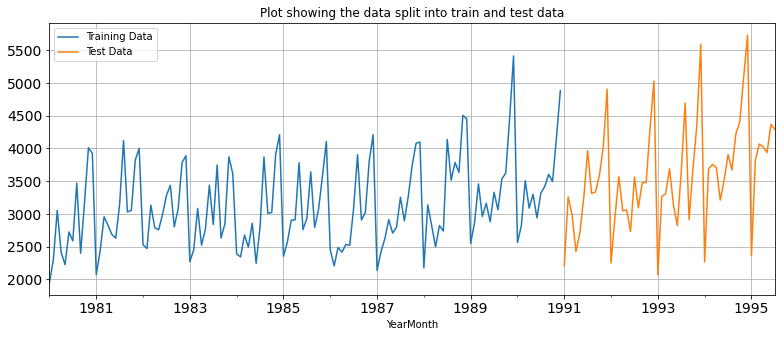

In [50]:
train['SoftDrinkProduction'].plot(figsize=(13,5), fontsize=14)
test['SoftDrinkProduction'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.title("Plot showing the data split into train and test data")
plt.legend(['Training Data','Test Data'])
plt.show()

4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

Model 1: Linear Regression

In [51]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [52]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [53]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [54]:
print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             SoftDrinkProduction  time
YearMonth                            
1980-01-01                 1954     1
1980-02-01                 2302     2
1980-03-01                 3054     3
1980-04-01                 2414     4
1980-05-01                 2226     5 

Last few rows of Training Data 
             SoftDrinkProduction  time
YearMonth                            
1990-08-01                 3418   128
1990-09-01                 3604   129
1990-10-01                 3495   130
1990-11-01                 4163   131
1990-12-01                 4882   132 

First few rows of Test Data 
             SoftDrinkProduction  time
YearMonth                            
1991-01-01                 2211   133
1991-02-01                 3260   134
1991-03-01                 2992   135
1991-04-01                 2425   136
1991-05-01                 2707   137 

Last few rows of Test Data 
             SoftDrinkProduction  time
YearMonth                       

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lr = LinearRegression()

In [57]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['SoftDrinkProduction'])

LinearRegression()

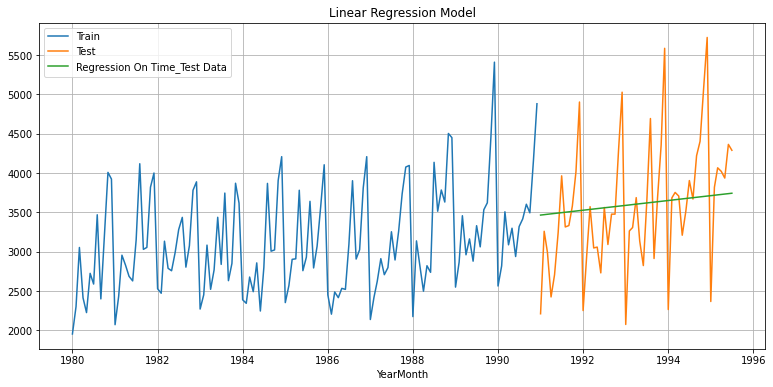

In [58]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.title('Linear Regression Model')
plt.xlabel('YearMonth')
plt.grid();

In [59]:
from sklearn import metrics

In [60]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['SoftDrinkProduction'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 775.808


In [61]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  775.80781

Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$




In [62]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [63]:
NaiveModel_test['naive'] = np.asarray(train['SoftDrinkProduction'])[len(np.asarray(train['SoftDrinkProduction']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    4882
1991-02-01    4882
1991-03-01    4882
1991-04-01    4882
1991-05-01    4882
Name: naive, dtype: int64

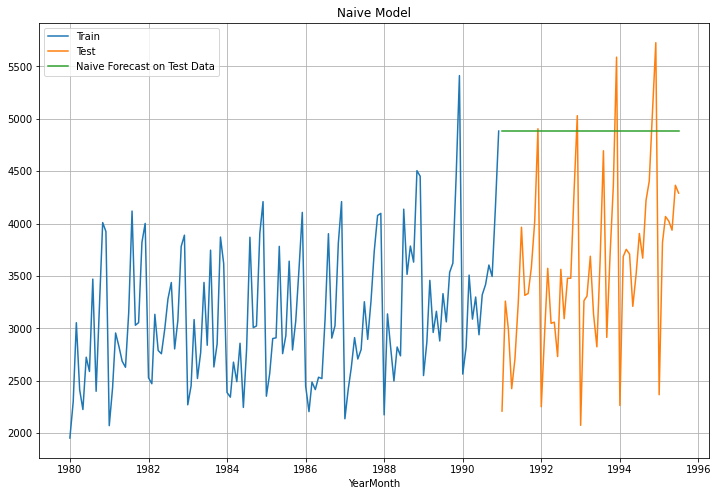

In [64]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Model")
plt.xlabel('YearMonth')
plt.grid();

In [65]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['SoftDrinkProduction'],NaiveModel_test['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive forecast on the Test Data,  RMSE is 1519.259


In [66]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime   775.807810
NaiveModel        1519.259233

Model 3: Simple Average

In [67]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [68]:
SimpleAverage_test['mean_forecast'] = train['SoftDrinkProduction'].mean()
SimpleAverage_test.head()

SoftDrinkProduction  mean_forecast
YearMonth                                     
1991-01-01                 2211    3124.166667
1991-02-01                 3260    3124.166667
1991-03-01                 2992    3124.166667
1991-04-01                 2425    3124.166667
1991-05-01                 2707    3124.166667

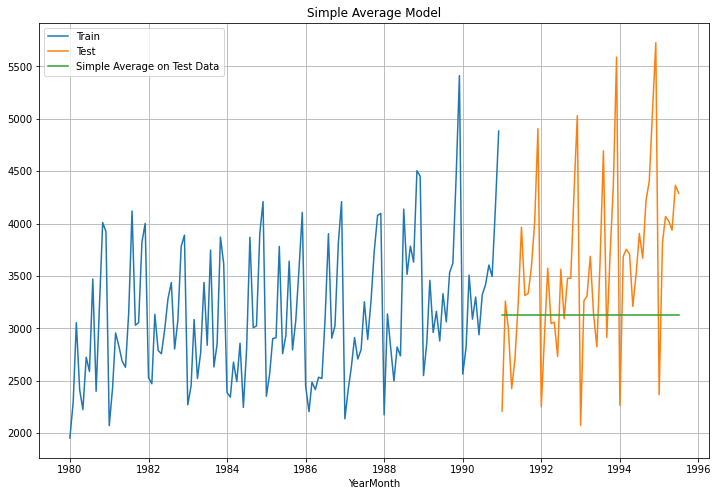

In [69]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(SimpleAverage_test['SoftDrinkProduction'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Model")
plt.xlabel('YearMonth')
plt.grid();

In [70]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['SoftDrinkProduction'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 934.353


In [71]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime     775.807810
NaiveModel          1519.259233
SimpleAverageModel   934.353358

Model 4: Moving Average (MA)

In [72]:
MovingAverage = df2.copy()
MovingAverage.head()

SoftDrinkProduction
YearMonth                      
1980-01-01                 1954
1980-02-01                 2302
1980-03-01                 3054
1980-04-01                 2414
1980-05-01                 2226

In [73]:
MovingAverage['Trailing_2'] = MovingAverage['SoftDrinkProduction'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['SoftDrinkProduction'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['SoftDrinkProduction'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['SoftDrinkProduction'].rolling(9).mean()

MovingAverage.head()

SoftDrinkProduction  Trailing_2  Trailing_4  Trailing_6  \
YearMonth                                                             
1980-01-01                 1954         NaN         NaN         NaN   
1980-02-01                 2302      2128.0         NaN         NaN   
1980-03-01                 3054      2678.0         NaN         NaN   
1980-04-01                 2414      2734.0      2431.0         NaN   
1980-05-01                 2226      2320.0      2499.0         NaN   

            Trailing_9  
YearMonth               
1980-01-01         NaN  
1980-02-01         NaN  
1980-03-01         NaN  
1980-04-01         NaN  
1980-05-01         NaN

In [74]:
MovingAverage.tail()

SoftDrinkProduction  Trailing_2  Trailing_4   Trailing_6  \
YearMonth                                                              
1995-03-01                 4067      3943.0     3994.50  4244.666667   
1995-04-01                 4022      4044.5     3568.75  4181.000000   
1995-05-01                 3937      3979.5     3961.25  3989.500000   
1995-06-01                 4365      4151.0     4097.75  3762.833333   
1995-07-01                 4290      4327.5     4153.50  4083.333333   

             Trailing_9  
YearMonth                
1995-03-01  4140.444444  
1995-04-01  4153.444444  
1995-05-01  4183.111111  
1995-06-01  4199.111111  
1995-07-01  4186.444444

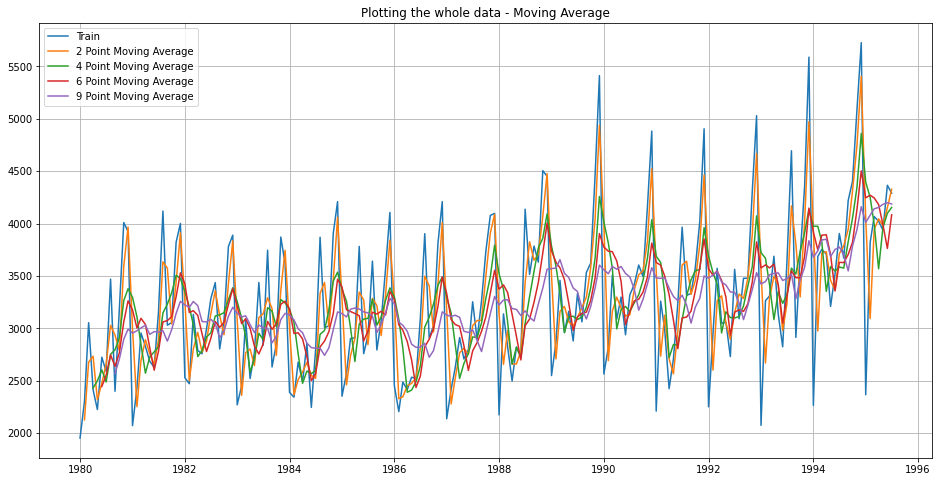

In [75]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['SoftDrinkProduction'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.title('Plotting the whole data - Moving Average')
plt.grid();

In [76]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

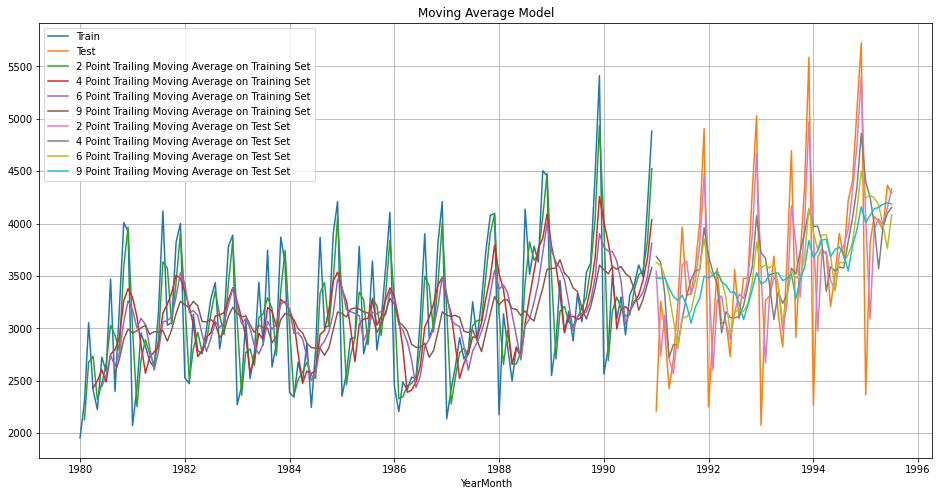

In [77]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(trailing_MovingAverage_test['SoftDrinkProduction'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.title('Moving Average Model')
plt.xlabel('YearMonth')
plt.grid();

In [78]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 556.725
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 687.182
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 710.514
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 735.890 


In [79]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime              775.807810
NaiveModel                   1519.259233
SimpleAverageModel            934.353358
2pointTrailingMovingAverage   556.725418
4pointTrailingMovingAverage   687.181726
6pointTrailingMovingAverage   710.513877
9pointTrailingMovingAverage   735.889827

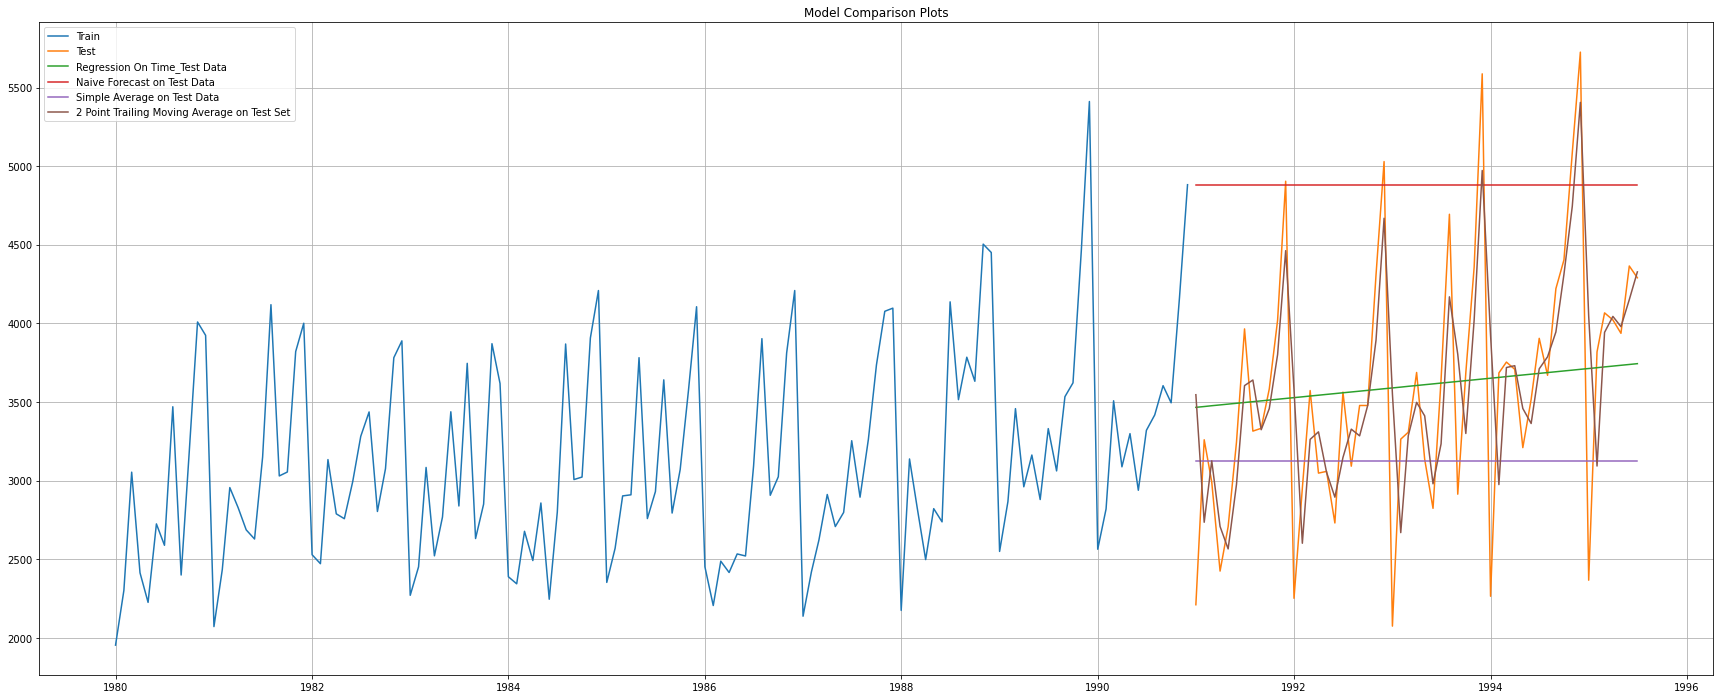

In [80]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

Model 5: Simple Exponential Smoothing Model

In [81]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [82]:
SES_train = train.copy()
SES_test = test.copy()

In [83]:
model_SES = SimpleExpSmoothing(SES_train['SoftDrinkProduction'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [84]:
model_SES_autofit = model_SES.fit(optimized=True)

In [85]:
model_SES_autofit.params

{'damping_trend': nan,
 'initial_level': 2297.4228976530508,
 'initial_seasons': array([], dtype=float64),
 'initial_trend': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.21628856026090063,
 'smoothing_seasonal': nan,
 'smoothing_trend': nan,
 'use_boxcox': False}

In [86]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

SoftDrinkProduction      predict
YearMonth                                   
1991-01-01                 2211  3853.781071
1991-02-01                 3260  3853.781071
1991-03-01                 2992  3853.781071
1991-04-01                 2425  3853.781071
1991-05-01                 2707  3853.781071

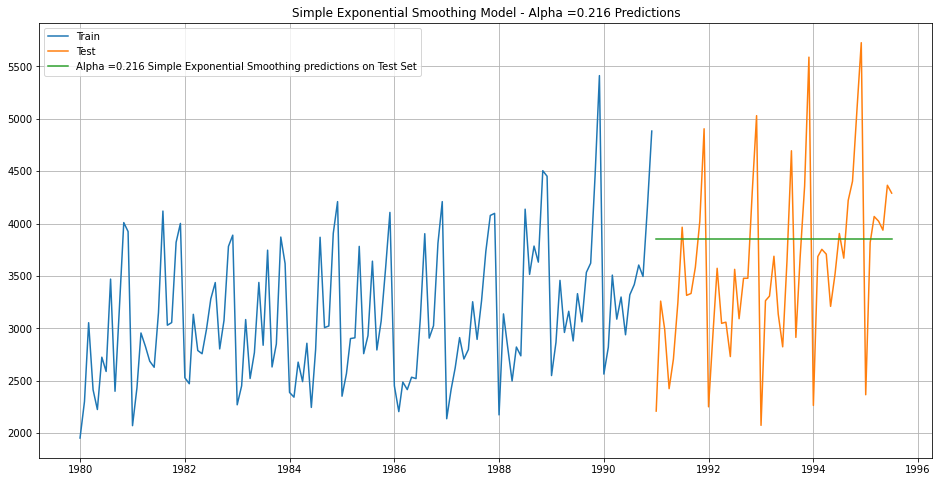

In [87]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['SoftDrinkProduction'], label='Train')
plt.plot(SES_test['SoftDrinkProduction'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.216 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple Exponential Smoothing Model - Alpha =0.216 Predictions');

In [88]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['SoftDrinkProduction'],SES_test['predict'],squared=False)
print("For Alpha =0.216 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.216 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 847.635


In [89]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.216,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                         775.807810
NaiveModel                              1519.259233
SimpleAverageModel                       934.353358
2pointTrailingMovingAverage              556.725418
4pointTrailingMovingAverage              687.181726
6pointTrailingMovingAverage              710.513877
9pointTrailingMovingAverage              735.889827
Alpha=0.216,SimpleExponentialSmoothing   847.635259

In [90]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [91]:
for i in np.arange(0.3,1.1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['SoftDrinkProduction'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['SoftDrinkProduction'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [92]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE    Test RMSE
0           0.3  650.458591   910.187416
1           0.4  656.803409  1005.179377
2           0.5  664.777265  1105.985227
3           0.6  674.988238  1203.565956
4           0.7  687.376817  1294.680933
5           0.8  701.579829  1378.198740
6           0.9  717.287681  1453.359494
7           1.0  734.461852  1519.259233

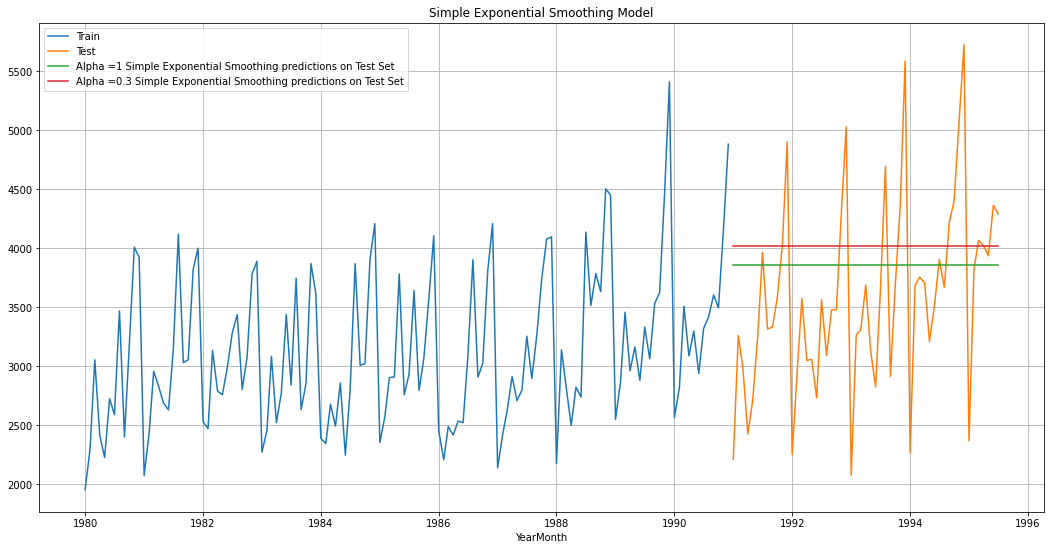

In [93]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['SoftDrinkProduction'], label='Train')
plt.plot(SES_test['SoftDrinkProduction'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')
plt.xlabel('YearMonth')
plt.title('Simple Exponential Smoothing Model');
plt.legend(loc='best')
plt.grid();

In [94]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
RegressionOnTime                         775.807810
NaiveModel                              1519.259233
SimpleAverageModel                       934.353358
2pointTrailingMovingAverage              556.725418
4pointTrailingMovingAverage              687.181726
6pointTrailingMovingAverage              710.513877
9pointTrailingMovingAverage              735.889827
Alpha=0.216,SimpleExponentialSmoothing   847.635259
Alpha=0.3,SimpleExponentialSmoothing     910.187416

Model 6: Double Exponential Smoothing (Holt's Model)

Two parameters 𝛼 and 𝛽 are estimated in this model. Level and Trend are accounted for in this model.

In [95]:
DES_train = train.copy()
DES_test = test.copy()

In [96]:
model_DES = Holt(DES_train['SoftDrinkProduction'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [97]:
model_optimal_DES = model_DES.fit(optimized = True)

In [98]:
model_optimal_DES.params

{'damping_trend': nan,
 'initial_level': 1958.7277961840355,
 'initial_seasons': array([], dtype=float64),
 'initial_trend': 33.76665140616291,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.4378514944499203,
 'smoothing_seasonal': nan,
 'smoothing_trend': 0.08358591543369835,
 'use_boxcox': False}

In [99]:
DES_test['predict'] = model_optimal_DES.forecast(steps=len(test))
DES_test.head()

SoftDrinkProduction      predict
YearMonth                                   
1991-01-01                 2211  4345.417816
1991-02-01                 3260  4417.060016
1991-03-01                 2992  4488.702216
1991-04-01                 2425  4560.344416
1991-05-01                 2707  4631.986616

Text(0.5, 0, 'YearMonth')

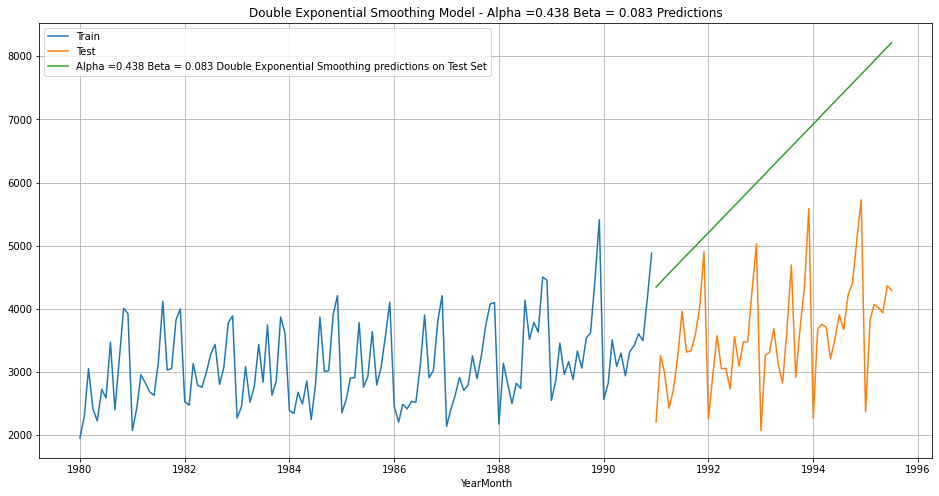

In [100]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['SoftDrinkProduction'], label='Train')
plt.plot(DES_test['SoftDrinkProduction'], label='Test')

plt.plot(DES_test['predict'], label='Alpha =0.438 Beta = 0.083 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Model - Alpha =0.438 Beta = 0.083 Predictions');
plt.xlabel('YearMonth')

In [101]:
## Test Data

rmse_model7_test_1 = metrics.mean_squared_error(DES_test['SoftDrinkProduction'],DES_test['predict'],squared=False)
print("For Alpha =0.438 Beta = 0.083 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model7_test_1))


For Alpha =0.438 Beta = 0.083 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 2892.864


In [102]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_model7_test_1]},index=['Alpha=0.438 Beta = 0.083 ,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

Test RMSE
RegressionOnTime                                     775.807810
NaiveModel                                          1519.259233
SimpleAverageModel                                   934.353358
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.216,SimpleExponentialSmoothing               847.635259
Alpha=0.3,SimpleExponentialSmoothing                 910.187416
Alpha=0.438 Beta = 0.083 ,DoubleExponentialSmoo...  2892.864115

In [103]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [104]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['SoftDrinkProduction'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['SoftDrinkProduction'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [105]:
resultsDf_7

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.3          0.3   734.358128   6574.951181
1            0.3          0.4   764.758634   9273.515812
2            0.3          0.5   795.818575  12225.585209
3            0.3          0.6   823.235298  14910.033945
4            0.3          0.7   842.633949  16660.432716
..           ...          ...          ...           ...
59           1.0          0.6   966.636686  20022.235284
60           1.0          0.7  1011.096621  21622.565951
61           1.0          0.8  1057.472273  22867.057965
62           1.0          0.9  1106.076606  23716.650022
63           1.0          1.0  1157.631749  24121.117155

[64 rows x 4 columns]

In [106]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE     Test RMSE
0            0.3          0.3  734.358128   6574.951181
8            0.4          0.3  738.383045   8561.385420
1            0.3          0.4  764.758634   9273.515812
16           0.5          0.3  741.869941   9764.656865
24           0.6          0.3  752.532546  10614.879977

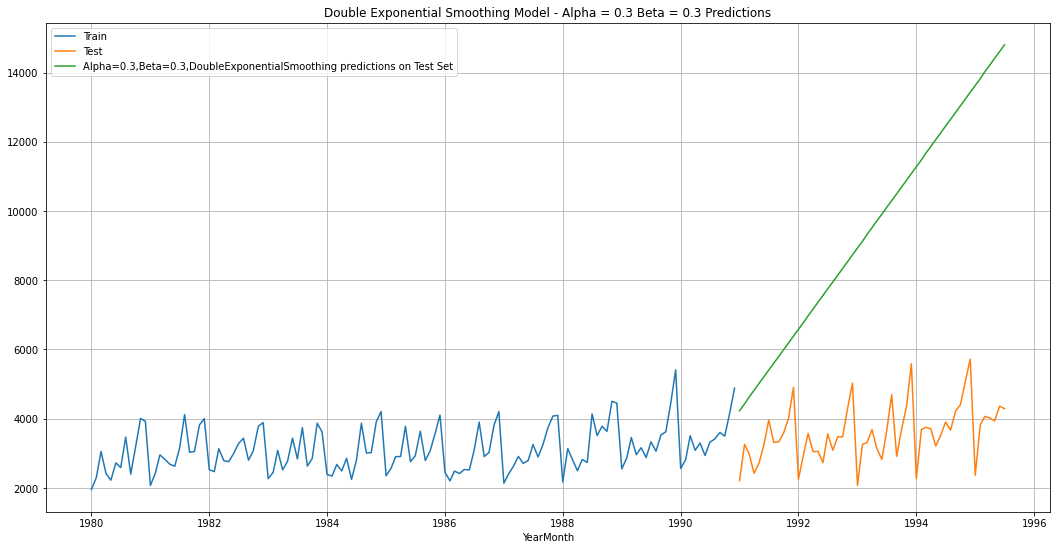

In [107]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['SoftDrinkProduction'], label='Train')
plt.plot(DES_test['SoftDrinkProduction'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

plt.title('Double Exponential Smoothing Model - Alpha = 0.3 Beta = 0.3 Predictions');
plt.xlabel('YearMonth')
plt.legend(loc='best')
plt.grid();

In [108]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                                     775.807810
NaiveModel                                          1519.259233
SimpleAverageModel                                   934.353358
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.216,SimpleExponentialSmoothing               847.635259
Alpha=0.3,SimpleExponentialSmoothing                 910.187416
Alpha=0.438 Beta = 0.083 ,DoubleExponentialSmoo...  2892.864115
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       6574.951181

Model 7: Triple Exponential Smoothing (Holt-Winter's Model)

Three parameters 𝛼 , 𝛽 and 𝛾 are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [109]:
TES_train = train.copy()
TES_test = test.copy()

In [110]:
model_TES = ExponentialSmoothing(TES_train['SoftDrinkProduction'],trend='additive',seasonal='multiplicative')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [111]:
model_TES_autofit = model_TES.fit()

In [112]:
model_TES_autofit.params

{'damping_trend': nan,
 'initial_level': 2803.2031192879085,
 'initial_seasons': array([0.81675206, 0.85707329, 1.03845496, 0.9260439 , 0.95069866,
        0.97315248, 1.03766339, 1.25338534, 0.99255867, 1.07376893,
        1.35052981, 1.38008798]),
 'initial_trend': 15.090789924689997,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.11109431519592447,
 'smoothing_seasonal': 0.23045135049306534,
 'smoothing_trend': 0.049376826867578195,
 'use_boxcox': False}

In [113]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

SoftDrinkProduction  auto_predict
YearMonth                                    
1991-01-01                 2211   2569.744680
1991-02-01                 3260   2890.183186
1991-03-01                 2992   3297.975314
1991-04-01                 2425   3008.698928
1991-05-01                 2707   3215.504574

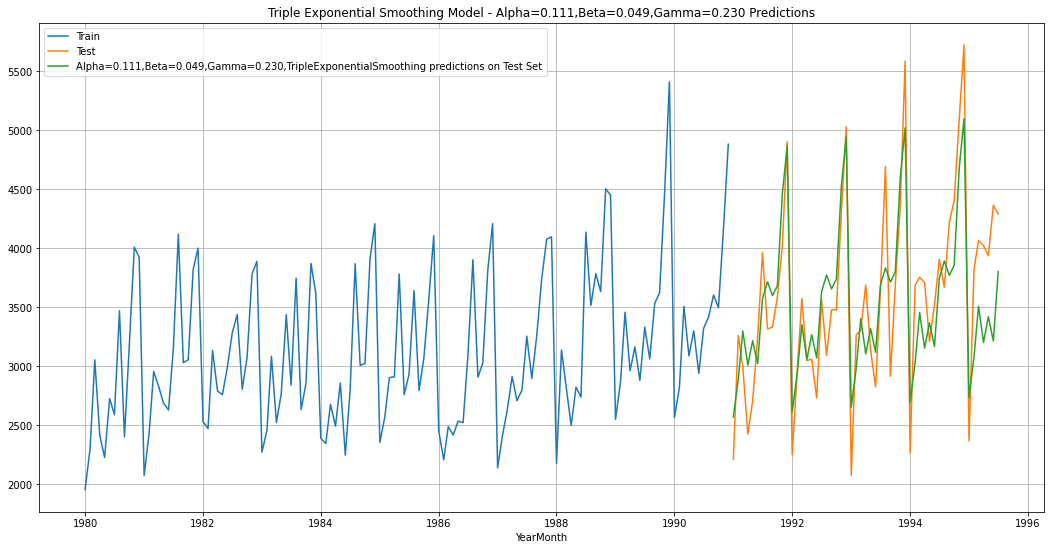

In [114]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['SoftDrinkProduction'], label='Train')
plt.plot(TES_test['SoftDrinkProduction'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.049,Gamma=0.230,TripleExponentialSmoothing predictions on Test Set')

plt.title('Triple Exponential Smoothing Model - Alpha=0.111,Beta=0.049,Gamma=0.230 Predictions');
plt.xlabel('YearMonth')
plt.legend(loc='best')
plt.grid();

In [115]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['SoftDrinkProduction'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.049,Gamma=0.230, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.111,Beta=0.049,Gamma=0.230, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 447.623


In [116]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.111,Beta=0.049,Gamma=0.230,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                     775.807810
NaiveModel                                          1519.259233
SimpleAverageModel                                   934.353358
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.216,SimpleExponentialSmoothing               847.635259
Alpha=0.3,SimpleExponentialSmoothing                 910.187416
Alpha=0.438 Beta = 0.083 ,DoubleExponentialSmoo...  2892.864115
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       6574.951181
Alpha=0.111,Beta=0.049,Gamma=0.230,TripleExpone...   447.622837

In [117]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [118]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['SoftDrinkProduction'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['SoftDrinkProduction'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented fr

In [119]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
64            0.4          0.3           0.3  373.320057  453.599111
16            0.3          0.5           0.3  413.619443  531.629744
220           0.6          0.6           0.7  555.505445  532.791333
276           0.7          0.5           0.7  611.037427  532.937714
74            0.4          0.4           0.5  455.538886  810.365058

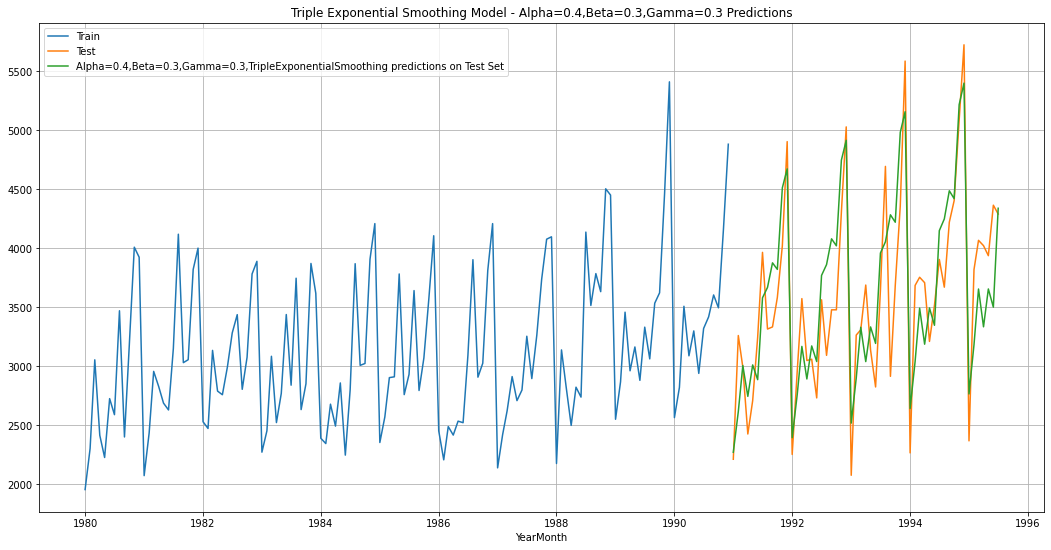

In [120]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['SoftDrinkProduction'], label='Train')
plt.plot(TES_test['SoftDrinkProduction'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.4, 0.3, 0.3], label='Alpha=0.4,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')
#plt.plot(TES_test['predict', 0.4, 0.3, 0.3], label='Alpha=0.4,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.title('Triple Exponential Smoothing Model - Alpha=0.4,Beta=0.3,Gamma=0.3 Predictions');
plt.xlabel('YearMonth')
plt.legend(loc='best')
plt.grid();

In [121]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.4,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE
RegressionOnTime                                     775.807810
NaiveModel                                          1519.259233
SimpleAverageModel                                   934.353358
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.216,SimpleExponentialSmoothing               847.635259
Alpha=0.3,SimpleExponentialSmoothing                 910.187416
Alpha=0.438 Beta = 0.083 ,DoubleExponentialSmoo...  2892.864115
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       6574.951181
Alpha=0.111,Beta=0.049,Gamma=0.230,TripleExpone...   447.622837
Alpha=0.4,Beta=0.3,Gamma=0.3,TripleExponentialS...   453.599111

In [122]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.111,Beta=0.049,Gamma=0.230,TripleExpone...   447.622837
Alpha=0.4,Beta=0.3,Gamma=0.3,TripleExponentialS...   453.599111
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
RegressionOnTime                                     775.807810
Alpha=0.216,SimpleExponentialSmoothing               847.635259
Alpha=0.3,SimpleExponentialSmoothing                 910.187416
SimpleAverageModel                                   934.353358
NaiveModel                                          1519.259233
Alpha=0.438 Beta = 0.083 ,DoubleExponentialSmoo...  2892.864115
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       6574.951181

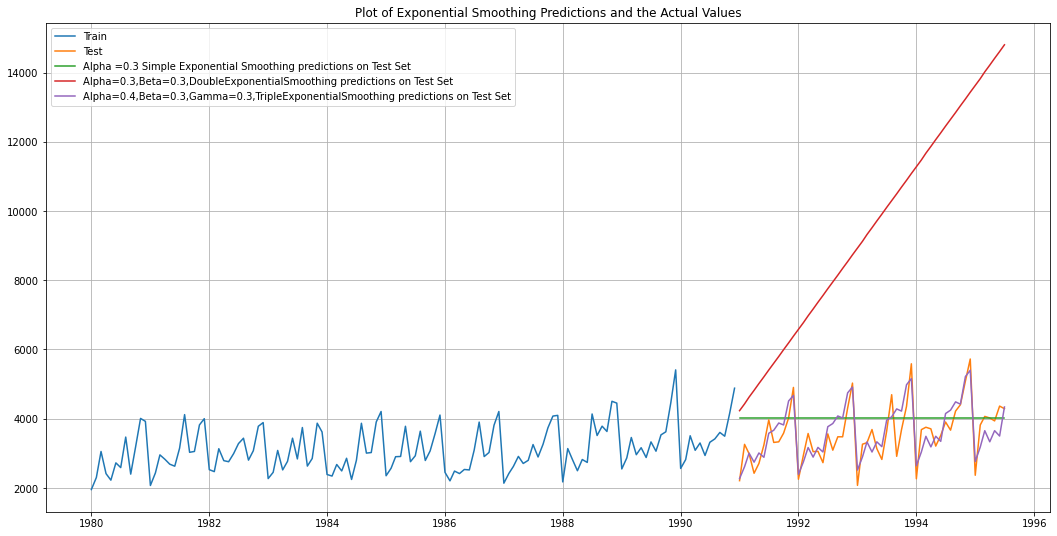

In [123]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.4, 0.3, 0.3], label='Alpha=0.4,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Actual Values');

5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

*   H0 : The Time Series has a unit root and is thus non-stationary.
*   H1 : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the α value.

In [124]:
from statsmodels.tsa.stattools import adfuller

In [125]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=5).mean()
    rolstd = timeseries.rolling(window=5).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC',regression='ct')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

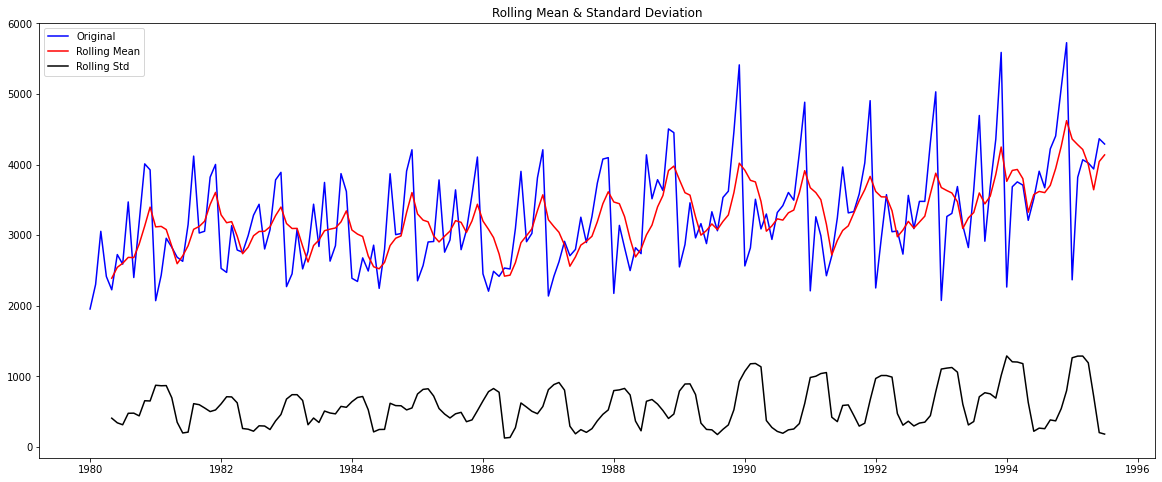

Results of Dickey-Fuller Test:
Test Statistic                  -0.424986
p-value                          0.986102
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -4.011764
Critical Value (5%)             -3.436029
Critical Value (10%)            -3.142044
dtype: float64 



In [126]:
test_stationarity(df2)

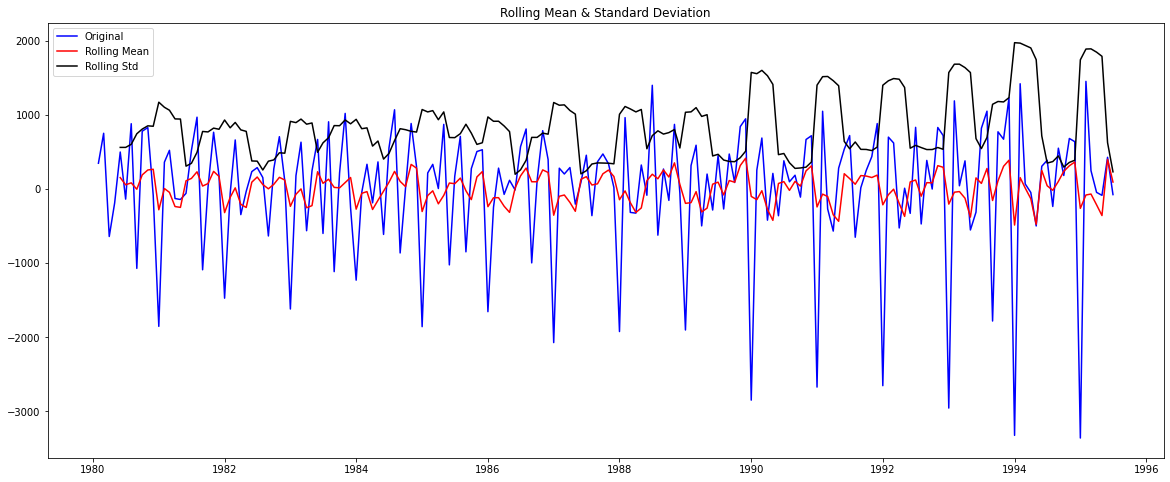

Results of Dickey-Fuller Test:
Test Statistic                -9.481347e+00
p-value                        3.053709e-14
#Lags Used                     1.100000e+01
Number of Observations Used    1.740000e+02
Critical Value (1%)           -4.011764e+00
Critical Value (5%)           -3.436029e+00
Critical Value (10%)          -3.142044e+00
dtype: float64 



In [127]:
test_stationarity(df2.diff().dropna())

6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

ARIMA Model

In [128]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [129]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [130]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['SoftDrinkProduction'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2103.7338336875
ARIMA(0, 1, 1) - AIC:2069.599630211387
ARIMA(0, 1, 2) - AIC:2056.4892632434744
ARIMA(0, 1, 3) - AIC:2056.831789419576
ARIMA(1, 1, 0) - AIC:2097.8721216490435
ARIMA(1, 1, 1) - AIC:2061.523083932287
ARIMA(1, 1, 2) - AIC:2056.71568206891
ARIMA(1, 1, 3) - AIC:2058.7121590366087
ARIMA(2, 1, 0) - AIC:2073.234860536024
ARIMA(2, 1, 1) - AIC:2059.100671813303
ARIMA(2, 1, 2) - AIC:2058.712702099236


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 1, 3) - AIC:2057.090827543574
ARIMA(3, 1, 0) - AIC:2070.3653671411785
ARIMA(3, 1, 1) - AIC:2058.3045464315055
ARIMA(3, 1, 2) - AIC:2060.6799657013657
ARIMA(3, 1, 3) - AIC:2059.6074252761423


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [131]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
2   (0, 1, 2)  2056.489263
6   (1, 1, 2)  2056.715682
3   (0, 1, 3)  2056.831789
11  (2, 1, 3)  2057.090828
13  (3, 1, 1)  2058.304546

In [132]:
auto_ARIMA = ARIMA(train, order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:                  ARIMA(0, 1, 2)   Log Likelihood               -1025.245
Date:                 Mon, 04 Apr 2022   AIC                           2056.489
Time:                         05:26:48   BIC                           2065.115
Sample:                     01-01-1980   HQIC                          2059.994
                          - 12-01-1990                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5407      0.085     -6.392      0.000      -0.707      -0.375
ma.L2         -0.3913      0.113     -3.475      0.001      -0.612      -0.171
sigma2      3.572e+05   4.62e+04      7.725 

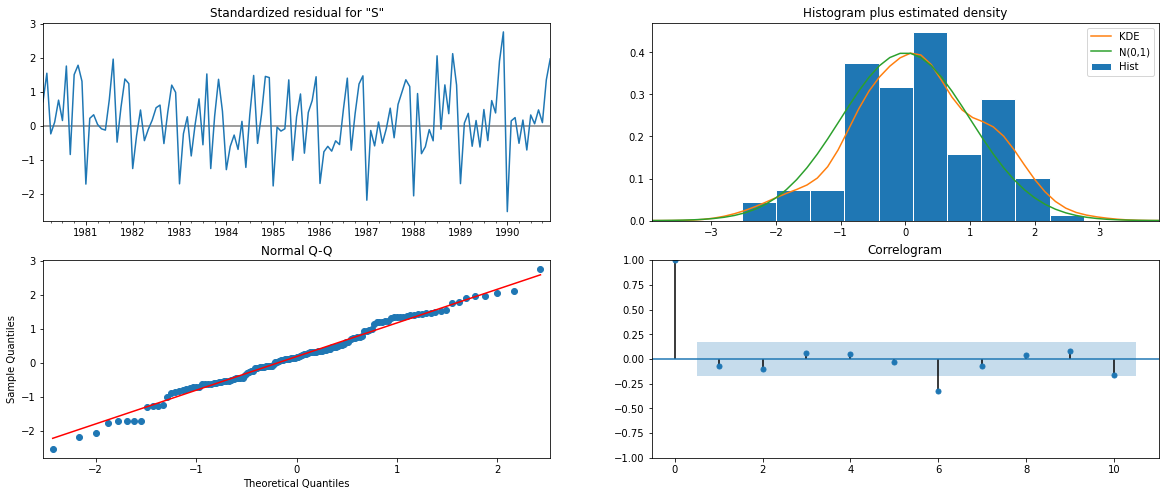

In [133]:
results_auto_ARIMA.plot_diagnostics();

In [134]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [135]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [136]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['SoftDrinkProduction'],predicted_auto_ARIMA)
print('RMSE for ARIMA:',rmse,'\nMAPE for ARIMA:',mape)

RMSE for ARIMA: 831.6158513483251 
MAPE for ARIMA: 18.494207971041433


In [137]:
resultsDf1 = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(0,1,2)'])

resultsDf1

RMSE       MAPE
ARIMA(0,1,2)  831.615851  18.494208

SARIMA Model

In [138]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

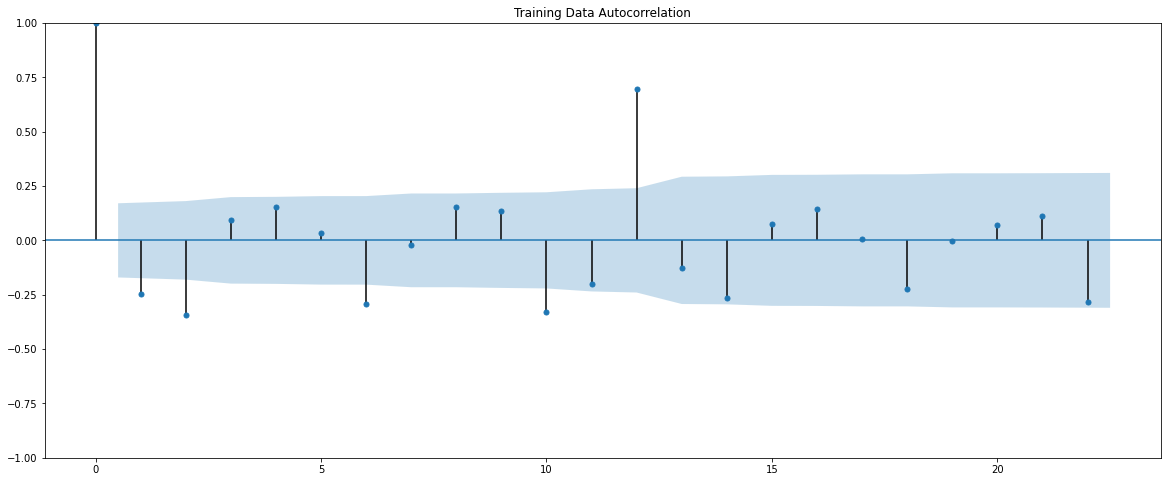

In [139]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

In [140]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [141]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [142]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2088.4633983660715
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1991.6865911398418
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1835.7619130468079
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1746.6922157437893
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2001.2435317896568
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1938.055937089057
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1819.7378453343545
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1714.4573272354903
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1790.6600051597607
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1790.4200189619728
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1765.5917652079142
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1681.2138650568832
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1704.3326684928627
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1702.201551291983
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1694.5477919272269
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1682.8986376032888
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2035.4871783907352
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1932.6082414352404
SARIMA(0, 1, 1)x(0, 0, 2, 6) -

In [143]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
255  (3, 1, 3)  (3, 0, 3, 6)  1589.761104
59   (0, 1, 3)  (2, 0, 3, 6)  1590.244407
191  (2, 1, 3)  (3, 0, 3, 6)  1591.011959
123  (1, 1, 3)  (2, 0, 3, 6)  1591.284672
63   (0, 1, 3)  (3, 0, 3, 6)  1592.243834

In [144]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'],
                                order=(3, 1, 3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:               SoftDrinkProduction   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 0, 3, 6)   Log Likelihood                -781.881
Date:                           Mon, 04 Apr 2022   AIC                           1589.761
Time:                                   05:30:26   BIC                           1624.749
Sample:                               01-01-1980   HQIC                          1603.950
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8582      0.139      6.171      0.000       0.586       1.131
ar.L2         -1.0003      0.104     -9.660

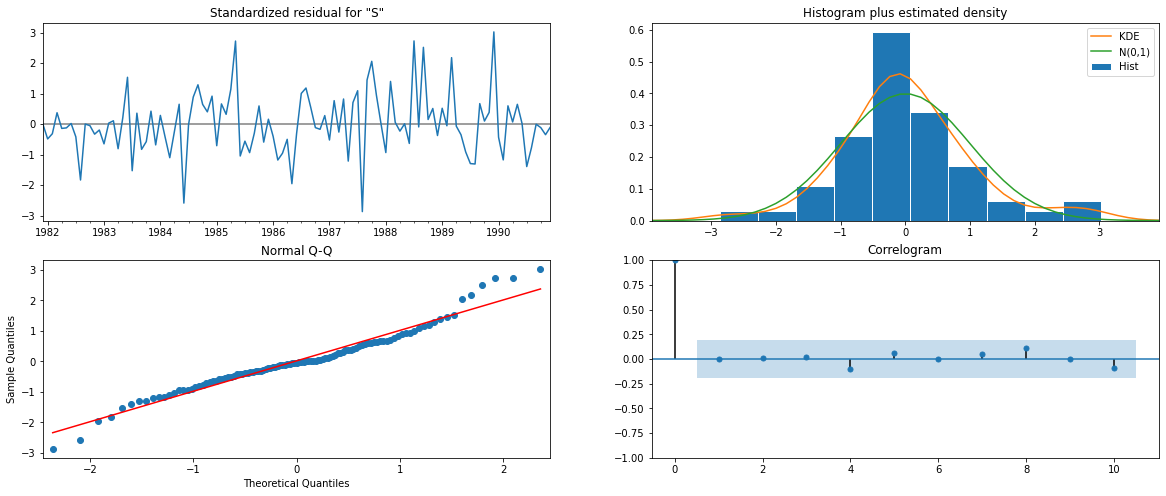

In [145]:
results_auto_SARIMA.plot_diagnostics();

In [146]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [147]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

SoftDrinkProduction         mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01           2810.818203  302.098353    2218.716312    3402.920094
1991-02-01           3144.904192  305.453807    2546.225731    3743.582652
1991-03-01           3278.982167  307.888890    2675.531031    3882.433302
1991-04-01           2957.384454  318.870849    2332.409073    3582.359834
1991-05-01           3330.250404  326.604239    2690.117859    3970.382949

In [148]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['SoftDrinkProduction'],predicted_auto_SARIMA.predicted_mean)
print('RMSE for SARIMA:',rmse,'\nMAPE for SARIMA:',mape)

RMSE for SARIMA: 428.6985141635827 
MAPE for SARIMA: 10.865842021565404


In [149]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(3,1,3)(3,0,3,6)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

RMSE       MAPE
ARIMA(0,1,2)            831.615851  18.494208
SARIMA(3,1,3)(3,0,3,6)  428.698514  10.865842

7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

Manual ARIMA Model

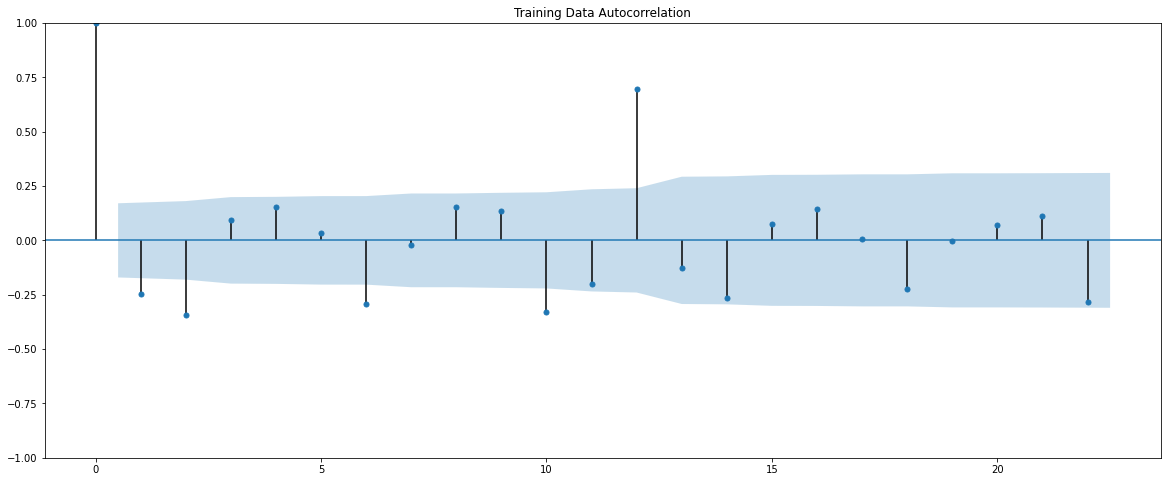

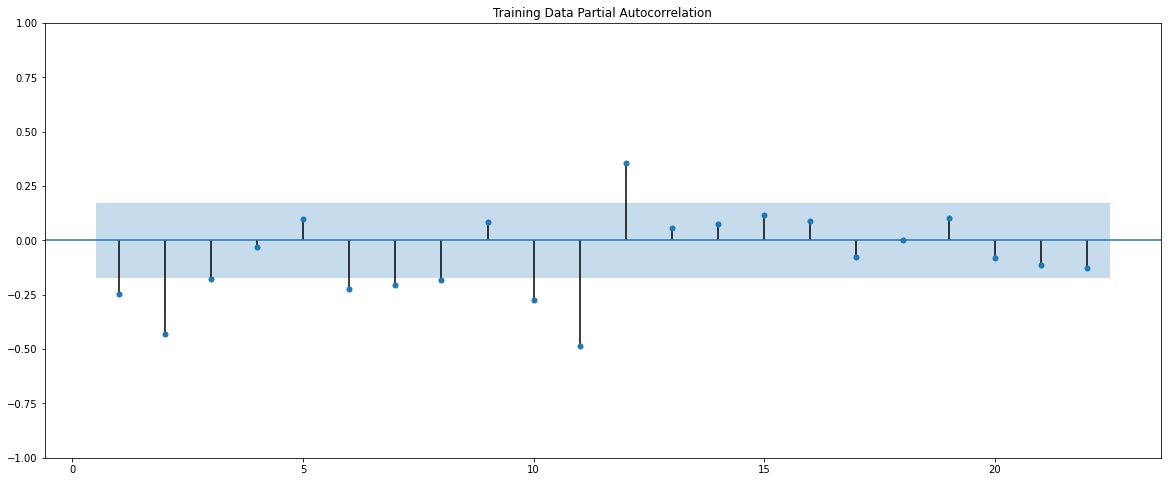

In [150]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

*   The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 3.
*   The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.

By looking at the above plots, we will take the value of p and q to be 3 and 2 respectively.

In [151]:
manual_ARIMA = ARIMA(train['SoftDrinkProduction'], order=(3,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:                  ARIMA(3, 1, 2)   Log Likelihood               -1024.340
Date:                 Mon, 04 Apr 2022   AIC                           2060.680
Time:                         05:30:28   BIC                           2077.931
Sample:                     01-01-1980   HQIC                          2067.690
                          - 12-01-1990                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3216      0.460     -0.700      0.484      -1.223       0.579
ar.L2         -0.0001      0.189     -0.001      0.999      -0.371       0.370
ar.L3         -0.0227      0.218     -0.104 

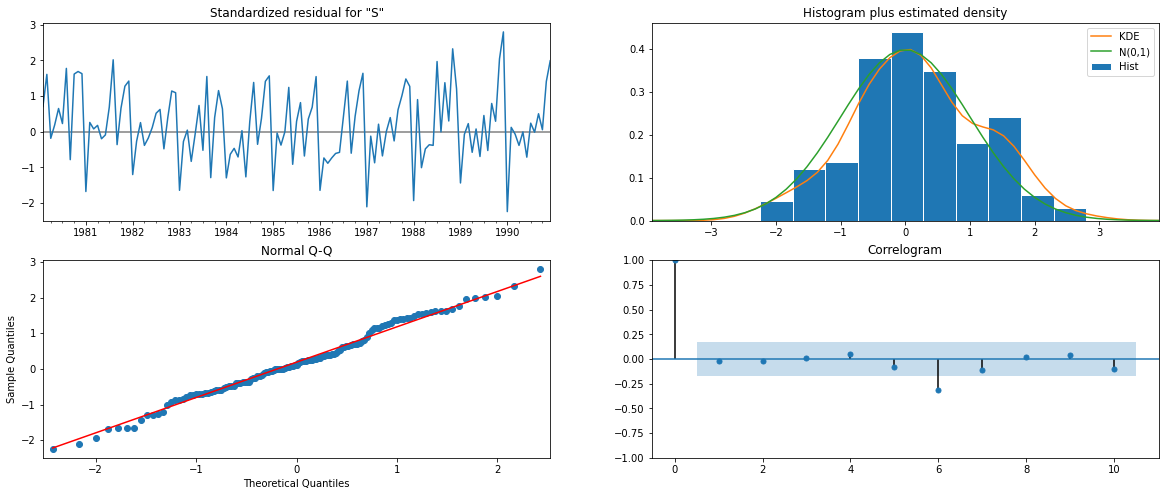

In [152]:
results_manual_ARIMA.plot_diagnostics();

In [153]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [154]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['SoftDrinkProduction'],predicted_manual_ARIMA)
print('RMSE for manual ARIMA:',rmse,'\nMAPE for manual ARIMA:',mape)

RMSE for manual ARIMA: 822.2174505020024 
MAPE for manual ARIMA: 18.363067569135197


In [155]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ACF&PACF - ARIMA(3,1,2)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

RMSE       MAPE
ARIMA(0,1,2)             831.615851  18.494208
SARIMA(3,1,3)(3,0,3,6)   428.698514  10.865842
ACF&PACF - ARIMA(3,1,2)  822.217451  18.363068

Manual SARIMA Model - Seasonality at 6

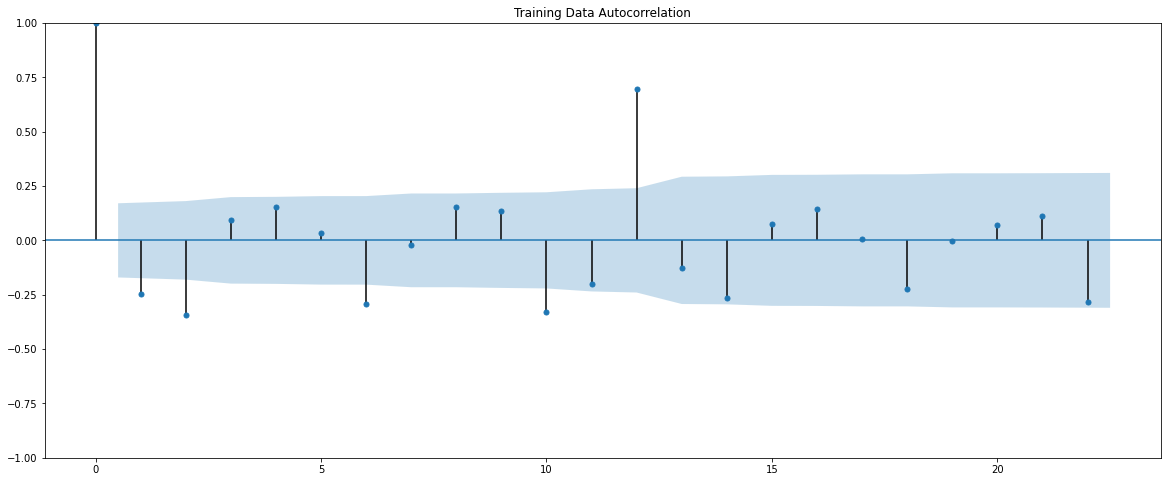

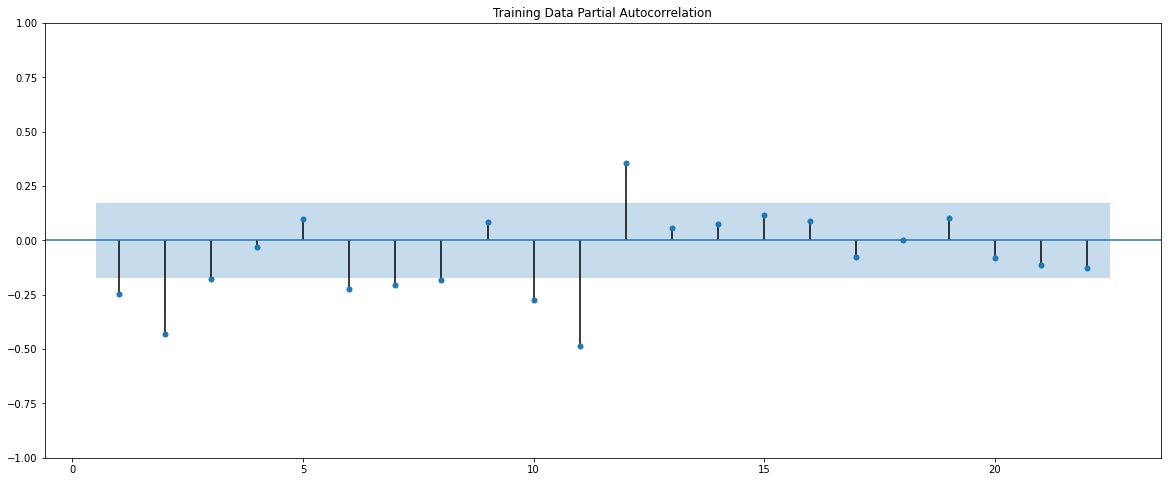

In [156]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6. We are taking the p value to be 3 and the q value also to be 2 as the parameters same as the ARIMA model.

*   The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
*   The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 0.

In [178]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'],
                                order=(3, 1, 2),
                                seasonal_order=(0, 0, 0, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:                SARIMAX(3, 1, 2)   Log Likelihood                -998.726
Date:                 Mon, 04 Apr 2022   AIC                           2009.453
Time:                         05:32:52   BIC                           2026.565
Sample:                     01-01-1980   HQIC                          2016.406
                          - 12-01-1990                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3108      0.665      0.467      0.640      -0.993       1.614
ar.L2         -0.2274      0.260     -0.874      0.382      -0.737       0.283
ar.L3          0.1461      0.171      0.853 

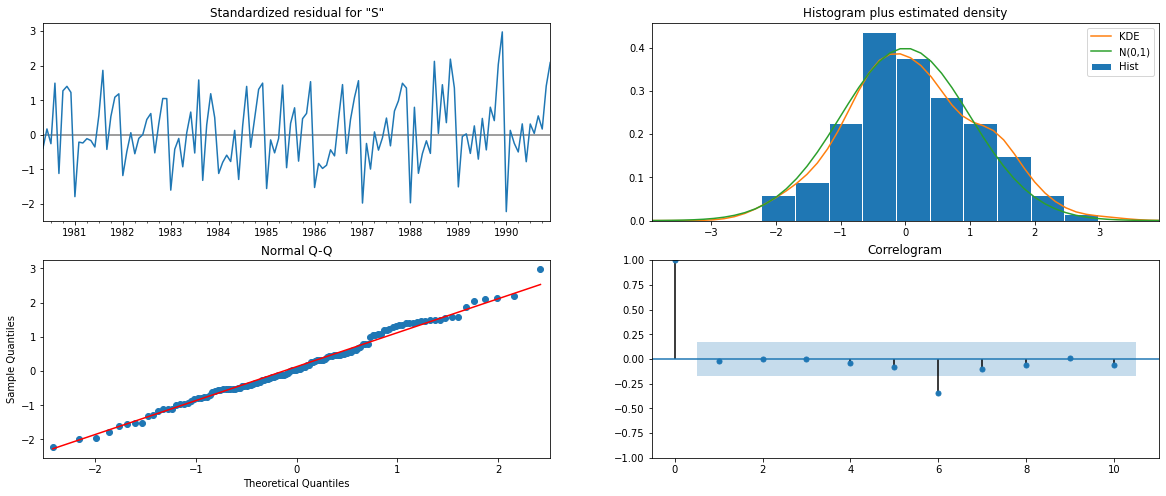

In [158]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [159]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [160]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['SoftDrinkProduction'],predicted_manual_SARIMA.predicted_mean)
print('RMSE for manual SARIMA:',rmse,'\nMAPE for manual SARIMA:',mape)

RMSE for manual SARIMA: 833.1223123696125 
MAPE for manual SARIMA: 18.427840261880604


In [161]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['ACF& PACF - SARIMA(3,1,2)(0,0,0,6)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

RMSE       MAPE
ARIMA(0,1,2)                        831.615851  18.494208
SARIMA(3,1,3)(3,0,3,6)              428.698514  10.865842
ACF&PACF - ARIMA(3,1,2)             822.217451  18.363068
ACF& PACF - SARIMA(3,1,2)(0,0,0,6)  833.122312  18.427840

8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [162]:
resultsDf

Test RMSE
RegressionOnTime                                     775.807810
NaiveModel                                          1519.259233
SimpleAverageModel                                   934.353358
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.216,SimpleExponentialSmoothing               847.635259
Alpha=0.3,SimpleExponentialSmoothing                 910.187416
Alpha=0.438 Beta = 0.083 ,DoubleExponentialSmoo...  2892.864115
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       6574.951181
Alpha=0.111,Beta=0.049,Gamma=0.230,TripleExpone...   447.622837
Alpha=0.4,Beta=0.3,Gamma=0.3,TripleExponentialS...   453.599111

In [163]:
resultsDf1

RMSE       MAPE
ARIMA(0,1,2)                        831.615851  18.494208
SARIMA(3,1,3)(3,0,3,6)              428.698514  10.865842
ACF&PACF - ARIMA(3,1,2)             822.217451  18.363068
ACF& PACF - SARIMA(3,1,2)(0,0,0,6)  833.122312  18.427840

9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [164]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.111,Beta=0.049,Gamma=0.230,TripleExpone...   447.622837
Alpha=0.4,Beta=0.3,Gamma=0.3,TripleExponentialS...   453.599111
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
RegressionOnTime                                     775.807810
Alpha=0.216,SimpleExponentialSmoothing               847.635259
Alpha=0.3,SimpleExponentialSmoothing                 910.187416
SimpleAverageModel                                   934.353358
NaiveModel                                          1519.259233
Alpha=0.438 Beta = 0.083 ,DoubleExponentialSmoo...  2892.864115
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       6574.951181

In [165]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf1.sort_values(by=['RMSE'])

Sorted by RMSE values on the Test Data: 



RMSE       MAPE
SARIMA(3,1,3)(3,0,3,6)              428.698514  10.865842
ACF&PACF - ARIMA(3,1,2)             822.217451  18.363068
ARIMA(0,1,2)                        831.615851  18.494208
ACF& PACF - SARIMA(3,1,2)(0,0,0,6)  833.122312  18.427840

Triple Exponential Smoothing Model

In [166]:
fullmodel1 = ExponentialSmoothing(df2,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.111,
                                                                 smoothing_trend=0.049,
                                                                 smoothing_seasonal=0.230)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [167]:
RMSE_fullmodel1 = metrics.mean_squared_error(df2['SoftDrinkProduction'],fullmodel1.fittedvalues,squared=False)

print('RMSE for the full model (Triple Exponential Smoothing):',RMSE_fullmodel1)

RMSE for the full model (Triple Exponential Smoothing): 333.471077684034


In [168]:
prediction_1 = fullmodel1.forecast(steps=12)

Text(0.5, 1.0, 'Forecast using Triple Exponential Smoothing Model')

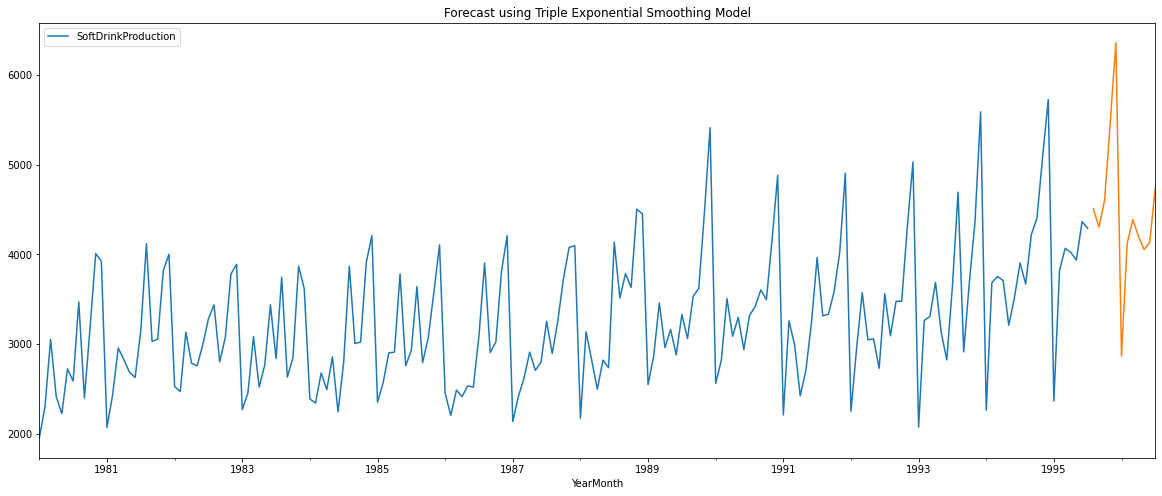

In [169]:
df2.plot()
prediction_1.plot();
plt.title('Forecast using Triple Exponential Smoothing Model')

In [170]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI   prediction     upper_ci
1995-08-01  3851.467097  4506.118588  5160.770079
1995-09-01  3649.315240  4303.966731  4958.618222
1995-10-01  3946.991594  4601.643085  5256.294576
1995-11-01  4816.844083  5471.495574  6126.147065
1995-12-01  5703.777992  6358.429483  7013.080974

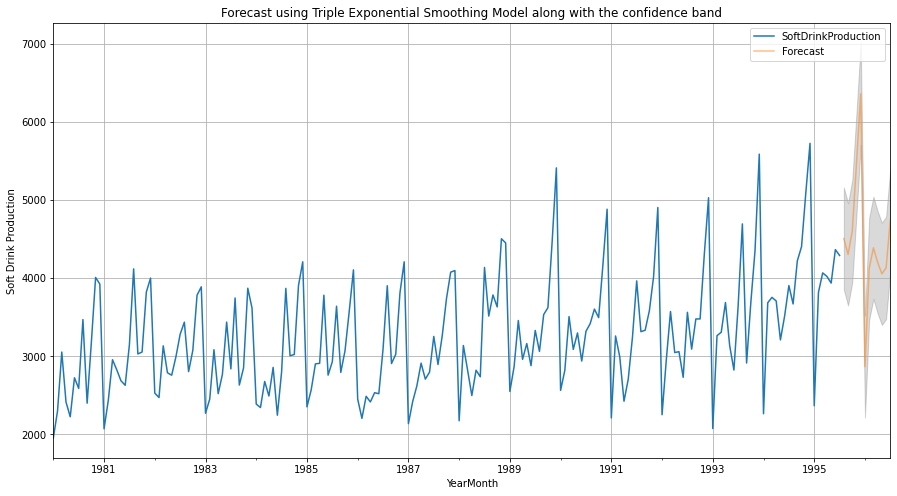

In [171]:
# plot the forecast along with the confidence band

axis = df2.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('YearMonth')
axis.set_ylabel('Soft Drink Production')
plt.title('Forecast using Triple Exponential Smoothing Model along with the confidence band')
plt.legend(loc='best')
plt.grid()
plt.show()

SARIMA Model

In [172]:
fullmodel2 = sm.tsa.statespace.SARIMAX(df2['SoftDrinkProduction'],
                                order=(3,1,3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = fullmodel2.fit(maxiter=1000)
print(results_full_data_model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:               SoftDrinkProduction   No. Observations:                  187
Model:             SARIMAX(3, 1, 3)x(3, 0, 3, 6)   Log Likelihood               -1191.191
Date:                           Mon, 04 Apr 2022   AIC                           2408.382
Time:                                   05:30:40   BIC                           2448.680
Sample:                               01-01-1980   HQIC                          2424.742
                                    - 07-01-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8042      0.662     -1.215      0.225      -2.102       0.494
ar.L2         -0.1702      0.639     -0.266

In [173]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [174]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

SoftDrinkProduction         mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-01           4332.502667  338.261723    3669.521873    4995.483462
1995-09-01           4222.067120  340.484258    3554.730237    4889.404003
1995-10-01           4518.285554  341.785841    3848.397616    5188.173493
1995-11-01           5246.599109  343.792500    4572.778191    5920.420026
1995-12-01           6019.119757  352.983470    5327.284869    6710.954645

In [175]:
rmse = mean_squared_error(df2['SoftDrinkProduction'],results_full_data_model.fittedvalues,squared=False)
print('RMSE for the full model (SARIMA):',rmse)

RMSE for the full model (SARIMA): 445.9190830529295


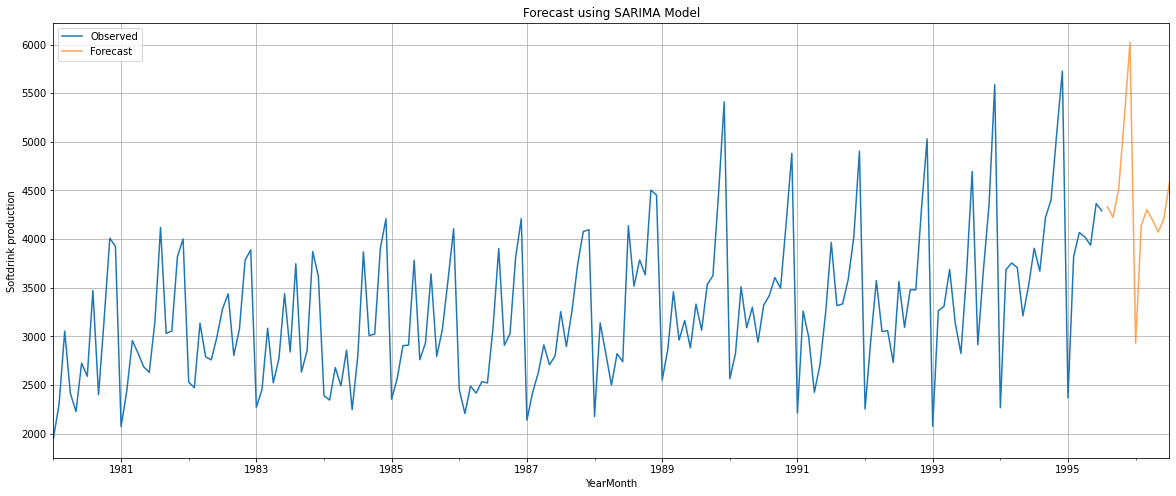

In [176]:
axis = df2['SoftDrinkProduction'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
plt.title('Forecast using SARIMA Model')
axis.set_xlabel('YearMonth')
axis.set_ylabel('Softdrink production')
plt.legend(loc='best')
plt.grid();

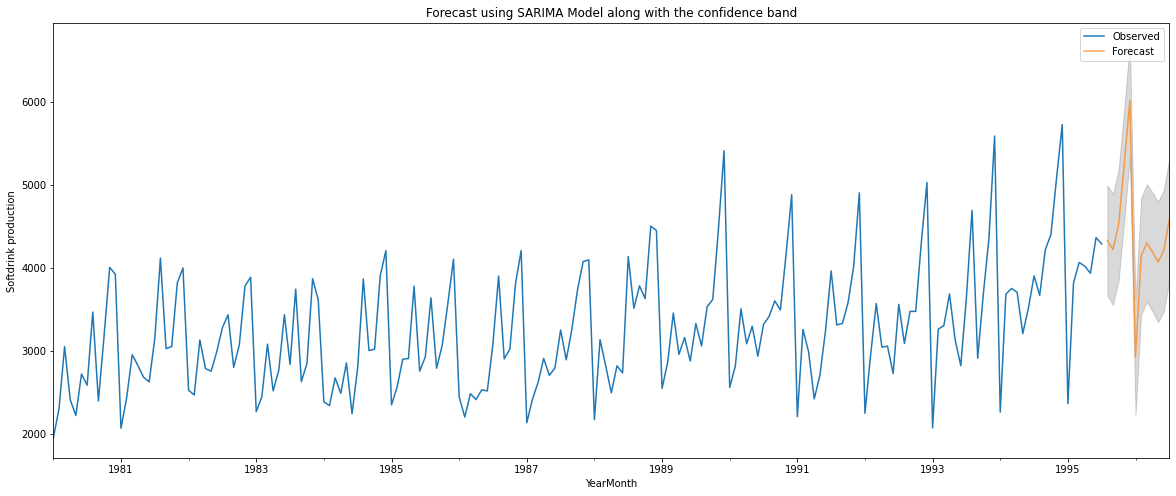

In [177]:
# plot the forecast along with the confidence band

axis = df2['SoftDrinkProduction'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('YearMonth')
axis.set_ylabel('Softdrink production')
plt.title('Forecast using SARIMA Model along with the confidence band')
plt.legend(loc='best')
plt.show()

END